[RUN DIR] C:\Users\prabu\Dissertation\results\run_20250903_191335
[OK] Cleaned CSV -> results\run_20250903_191335\ohlcv_5min.csv
[EDA] assets=5
[EDA] Audit -> results\run_20250903_191335\audit_summary.csv
[BASELINES] Metrics -> results\run_20250903_191335\baselines_metrics_cost5bps.csv
[BASELINES] Metrics -> results\run_20250903_191335\baselines_metrics_cost3bps.csv


Single-Agent PPO: 100%|████████████████████████████████████████████████████████████████| 30/30 [11:09<00:00, 22.32s/it]


[SINGLE] OOS Sharpe=0.988  Sortino=1.354  MaxDD=0.049  |  PSR=0.752  DSR~=0.410  p_boot=0.278


Single-Agent PPO: 100%|████████████████████████████████████████████████████████████████| 30/30 [10:54<00:00, 21.81s/it]


[SINGLE] OOS Sharpe=1.865  Sortino=2.584  MaxDD=0.032  |  PSR=0.902  DSR~=0.648  p_boot=0.092


MARL CTDE-PPO: 100%|███████████████████████████████████████████████████████████████████| 30/30 [17:47<00:00, 35.58s/it]


[MARL OFF] OOS Sharpe=0.998  Sortino=1.370  MaxDD=0.047  |  PSR=0.755  DSR~=0.413  p_boot=0.277


MARL CTDE-PPO: 100%|███████████████████████████████████████████████████████████████████| 30/30 [17:57<00:00, 35.90s/it]


[MARL ON] OOS Sharpe=-0.436  Sortino=-0.606  MaxDD=0.149  |  PSR=0.382  DSR~=0.114  p_boot=0.627
[TABLE 4.1] -> results\run_20250903_191335\table_4_1_full_metrics.csv
[SUMMARY] -> results\run_20250903_191335\summary_metrics.csv

Design notes:

- Data: Bloomberg EDU, 5-min OHLCV, Jan-2024 to Jun-2025, assets per provided sheets.
- Split: Train < 2025-01-01, Test = 2025-01-01..2025-06-30.
- Constraints: per-asset cap = 0.30; Σw ≤ 1 with cash.
- Costs: main 5.0 bps (sens 3.0 bps). Bootstrap block=78 bars (~1 day).
- Baselines: EW (static), MinVar (static from train cov), InvVol (monthly rebalanced, targets from train vol). All capped at rebalance targets; weights drift between rebalances.
- RL: PPO with GAE; Actor (256,128), Critic (256,256,128), clip=0.2, entropy=0.01, minibatch=1024, 10 epochs/update.
- CTDE MARL: central critic over joint obs; per-asset actors.
- MCP: binary context alerts with TTL≈30 min — Turnover Alert=1 if prior-hour turnover>50%; Drawdown Alert=1 if running drawdo

## Run Outputs

[RUN DIR] C:\Users\prabu\Dissertation\results\run_20250903_191335


### EDA

#### audit_summary.csv

,Ticker,Start,End,TradingDays,TotalBars,MeanBars/Day,MedianBars/Day,MissingBarsRatio(est)
0,AAPL,2024-01-02 14:30:00,2025-06-30 20:55:00,374,29218,78.122995,78.0,-0.001577
1,AMZN,2024-01-02 14:30:00,2025-06-30 20:55:00,374,29223,78.136364,78.0,-0.001748
2,MSFT,2024-01-02 14:30:00,2025-06-30 20:55:00,374,29216,78.117647,78.0,-0.001508
3,SPY,2024-01-02 14:30:00,2025-06-30 20:55:00,374,29337,78.441176,78.0,-0.005656
4,TSLA,2024-01-02 14:30:00,2025-06-30 20:55:00,374,29234,78.165775,78.0,-0.002125


#### eda_normalized.png

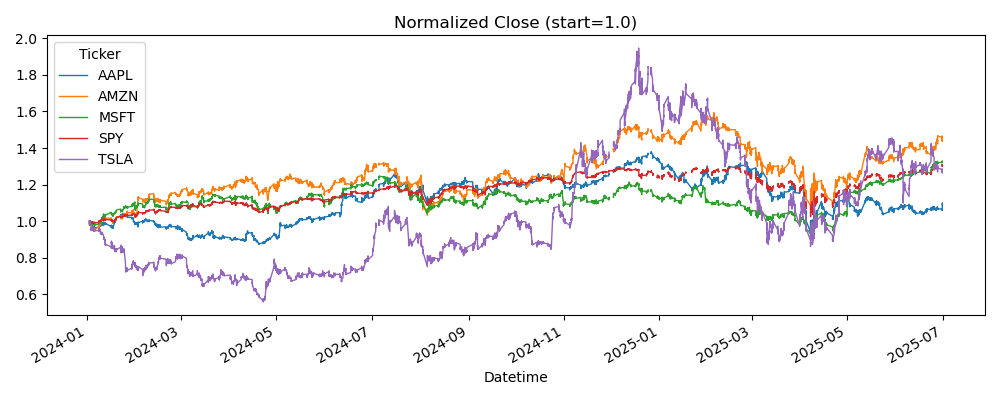

#### eda_return_hist.png

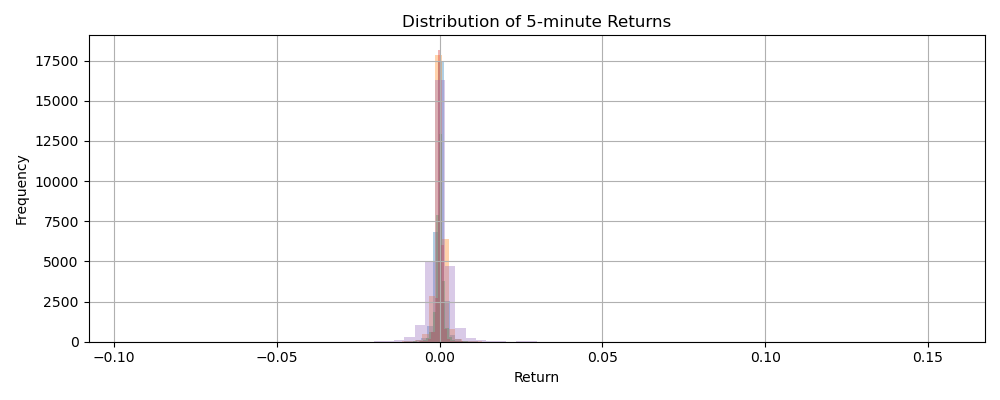

#### eda_intraday_profile.png

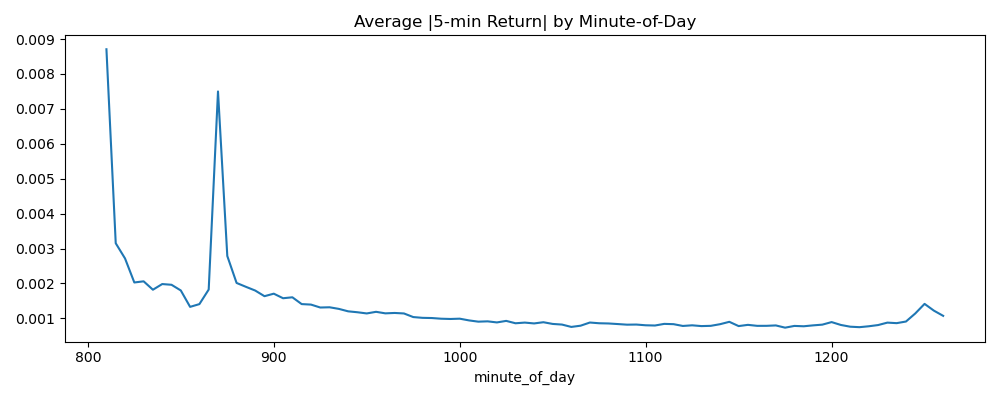

#### eda_corr_train.png

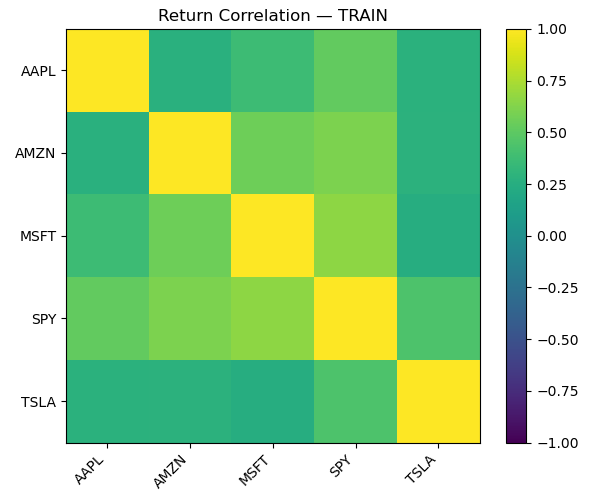

#### eda_corr_test.png

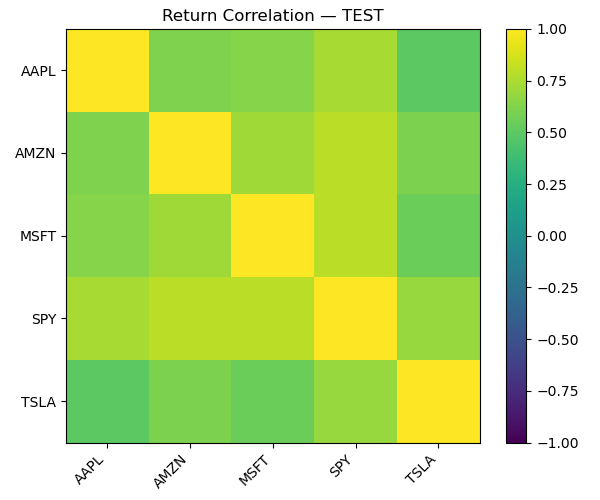

### Baselines

#### baselines_metrics_cost5bps.csv

,Strategy,Sharpe,Sortino,MaxDD
0,EW,0.578497,0.78780,0.135478
1,InvVol,0.932021,1.26013,0.099199
2,MinVar,0.578497,0.78780,0.135478


#### baselines_metrics_cost3bps.csv

,Strategy,Sharpe,Sortino,MaxDD
0,EW,0.580190,0.790132,0.135478
1,InvVol,0.932021,1.260130,0.099199
2,MinVar,0.580190,0.790132,0.135478


#### wgt_EW.png

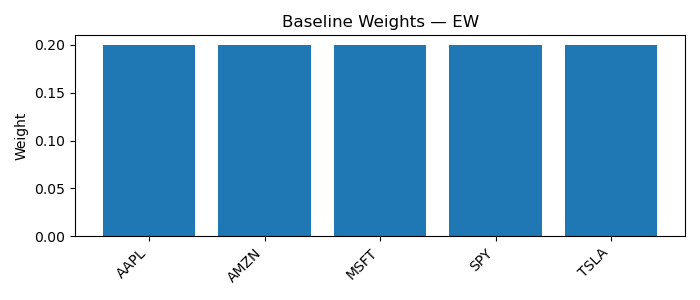

#### wgt_InvVol.png

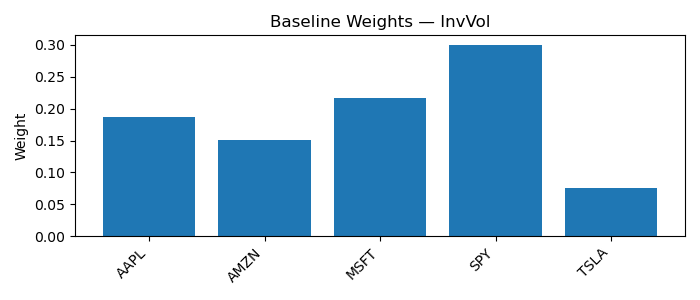

#### wgt_MinVar.png

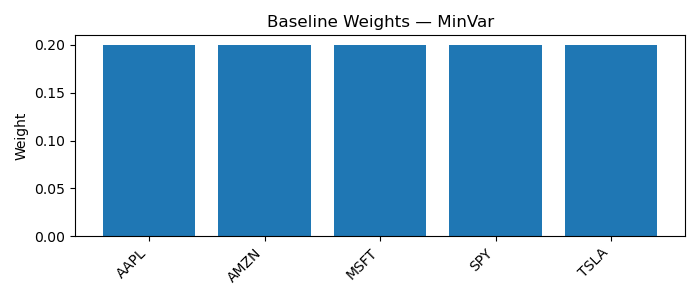

#### eq_EW.png

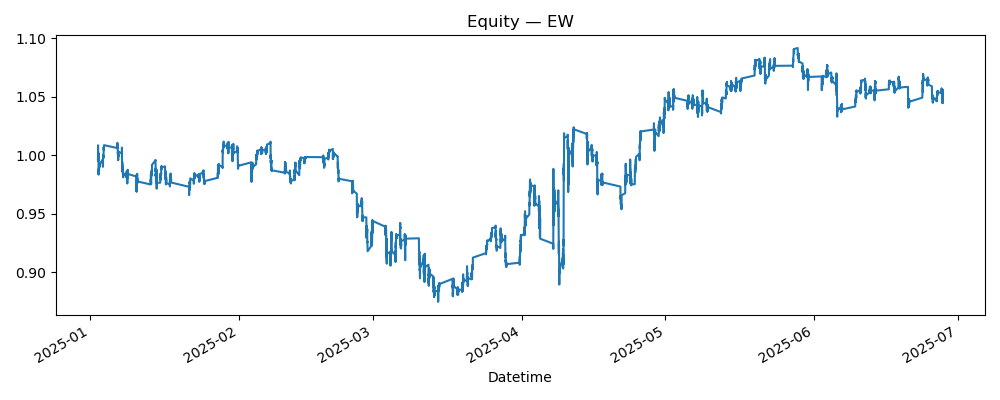

#### eq_InvVol.png

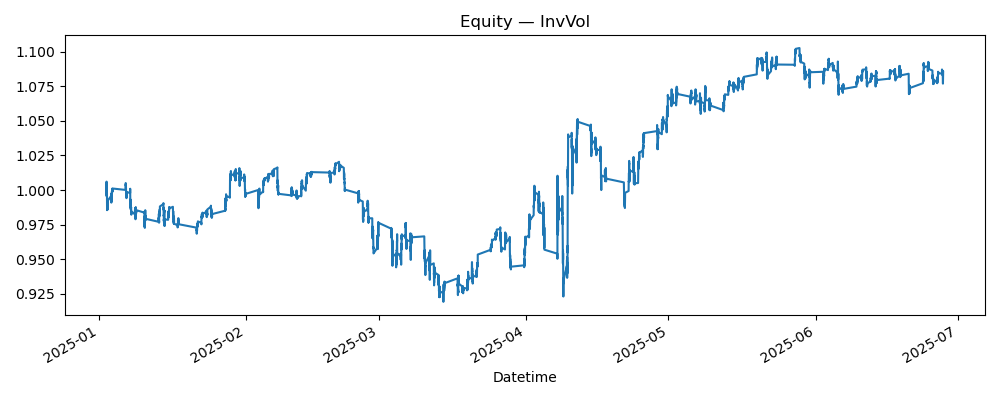

#### eq_MinVar.png

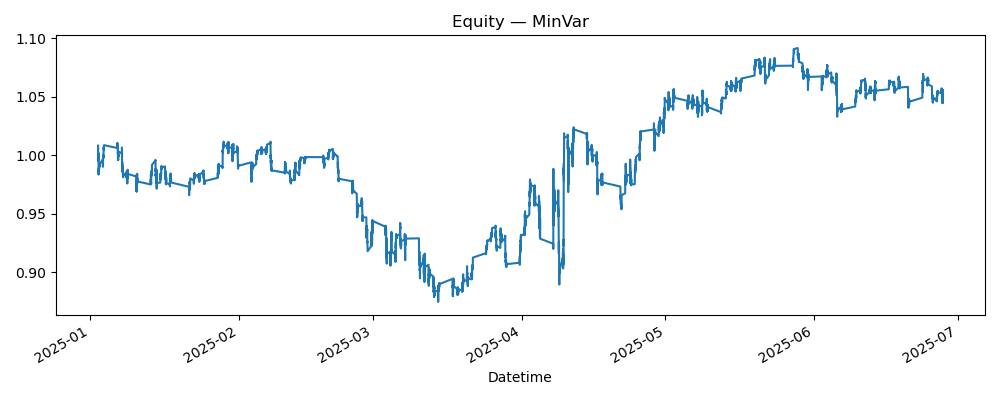

#### baseline_turnover_EW.csv

,Datetime,turnover
0,2025-01-02 14:35:00,1.0
1,2025-01-02 14:40:00,0.0
2,2025-01-02 14:45:00,0.0
3,2025-01-02 14:50:00,0.0
4,2025-01-02 14:55:00,0.0
5,2025-01-02 15:00:00,0.0
6,2025-01-02 15:05:00,0.0
7,2025-01-02 15:10:00,0.0
8,2025-01-02 15:15:00,0.0
9,2025-01-02 15:20:00,0.0


#### baseline_turnover_InvVol.csv

,Datetime,turnover
0,2025-01-02 14:35:00,0.930008
1,2025-01-02 14:40:00,0.000000
2,2025-01-02 14:45:00,0.000000
3,2025-01-02 14:50:00,0.000000
4,2025-01-02 14:55:00,0.000000
5,2025-01-02 15:00:00,0.000000
6,2025-01-02 15:05:00,0.000000
7,2025-01-02 15:10:00,0.000000
8,2025-01-02 15:15:00,0.000000
9,2025-01-02 15:20:00,0.000000


#### baseline_turnover_MinVar.csv

,Datetime,turnover
0,2025-01-02 14:35:00,1.0
1,2025-01-02 14:40:00,0.0
2,2025-01-02 14:45:00,0.0
3,2025-01-02 14:50:00,0.0
4,2025-01-02 14:55:00,0.0
5,2025-01-02 15:00:00,0.0
6,2025-01-02 15:05:00,0.0
7,2025-01-02 15:10:00,0.0
8,2025-01-02 15:15:00,0.0
9,2025-01-02 15:20:00,0.0


### Single-Agent PPO (5 bps)

#### single_main_5bps\train_return_curve.png

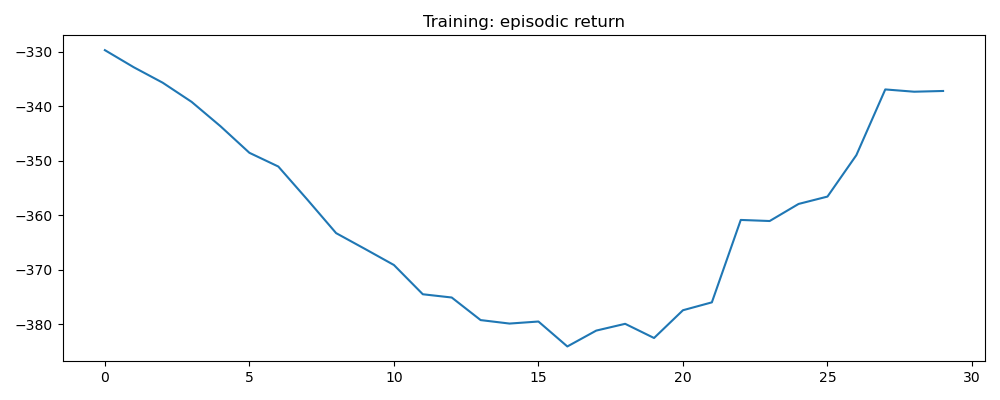

#### single_main_5bps\train_entropy_curve.png

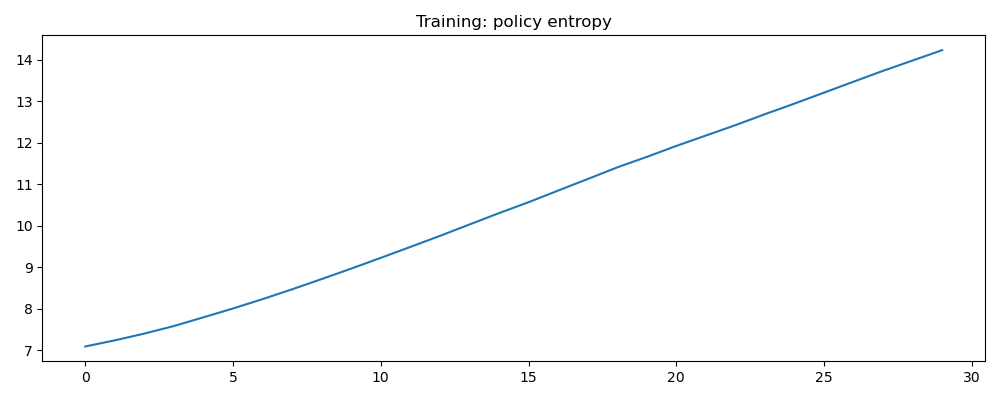

#### single_main_5bps\single_equity.png

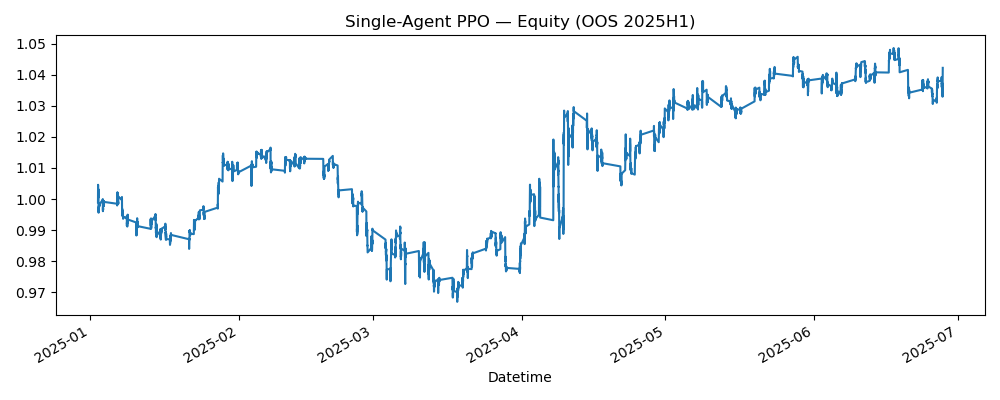

#### single_main_5bps\single_drawdown.png

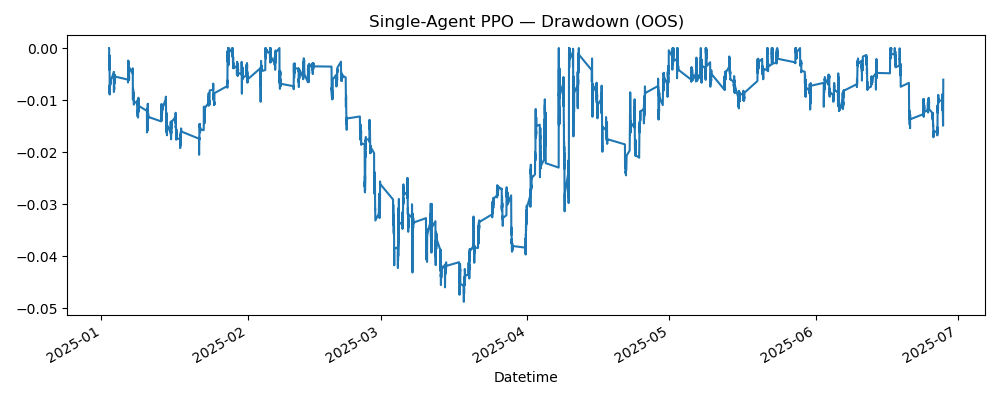

#### single_main_5bps\single_turnover.png

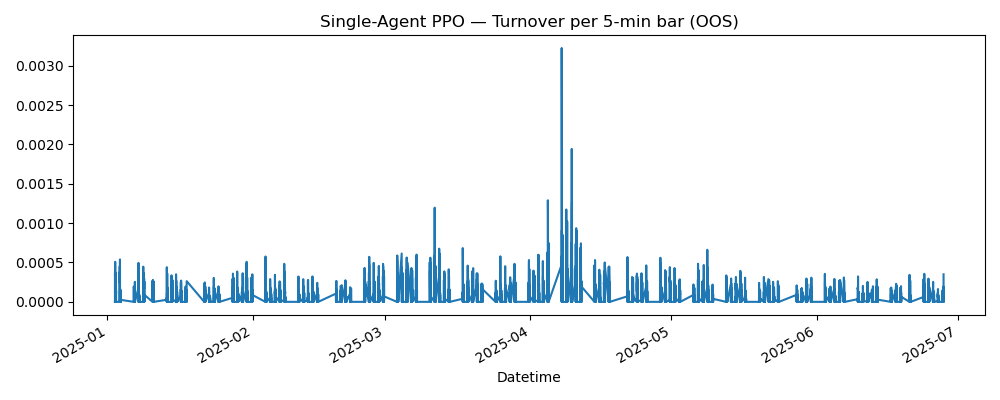

#### single_main_5bps\single_exposure_heatmap.png

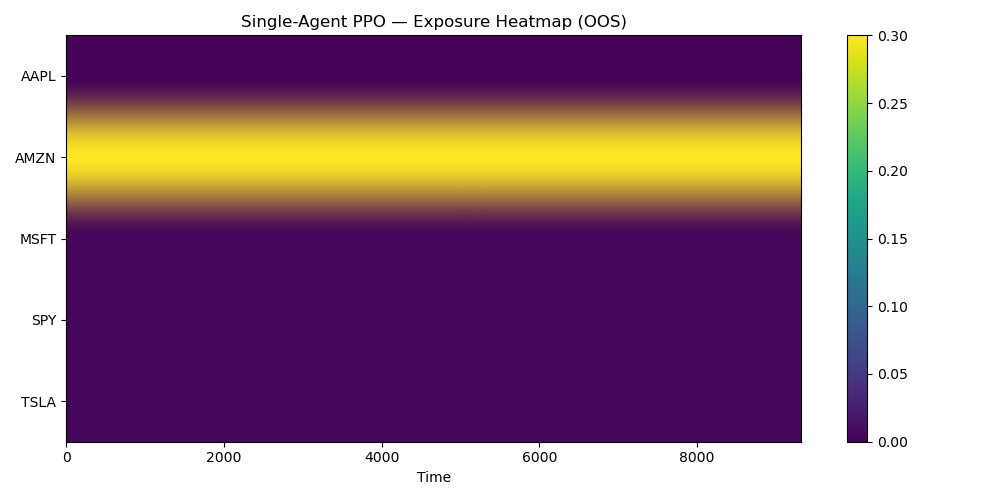

#### single_main_5bps\single_metrics.txt

Sharpe=0.988, Sortino=1.354, MaxDD=0.049
PSR(>0)=0.752, DSR~(N=10, rho=0.5)=0.410, Bootstrap-p(one-sided)=0.278



#### single_main_5bps\returns_oos.csv

,Datetime,ret
0,2025-01-02 14:35:00,-0.001065
1,2025-01-02 14:40:00,0.000616
2,2025-01-02 14:45:00,0.001625
3,2025-01-02 14:50:00,0.001507
4,2025-01-02 14:55:00,0.000965
5,2025-01-02 15:00:00,0.000275
6,2025-01-02 15:05:00,-0.000358
7,2025-01-02 15:10:00,0.001017
8,2025-01-02 15:15:00,-0.001159
9,2025-01-02 15:20:00,-0.001908


#### single_main_5bps\equity_oos.csv

,Datetime,Equity
0,2025-01-02 14:35:00,0.998935
1,2025-01-02 14:40:00,0.999550
2,2025-01-02 14:45:00,1.001174
3,2025-01-02 14:50:00,1.002684
4,2025-01-02 14:55:00,1.003651
5,2025-01-02 15:00:00,1.003927
6,2025-01-02 15:05:00,1.003568
7,2025-01-02 15:10:00,1.004589
8,2025-01-02 15:15:00,1.003425
9,2025-01-02 15:20:00,1.001510


#### single_main_5bps\single_exposures.csv

,Datetime,AAPL,AMZN,MSFT,SPY,TSLA
0,2025-01-02 14:35:00,0.002758,0.3,0.003652,0.005126,0.003908
1,2025-01-02 14:40:00,0.002758,0.3,0.003652,0.005126,0.003908
2,2025-01-02 14:45:00,0.002758,0.3,0.003652,0.005126,0.003908
3,2025-01-02 14:50:00,0.002816,0.3,0.003725,0.005224,0.004050
4,2025-01-02 14:55:00,0.002816,0.3,0.003725,0.005224,0.004050
5,2025-01-02 15:00:00,0.002816,0.3,0.003725,0.005224,0.004050
6,2025-01-02 15:05:00,0.002774,0.3,0.003670,0.005157,0.003960
7,2025-01-02 15:10:00,0.002774,0.3,0.003670,0.005157,0.003960
8,2025-01-02 15:15:00,0.002774,0.3,0.003670,0.005157,0.003960
9,2025-01-02 15:20:00,0.002724,0.3,0.003610,0.005073,0.003855


#### single_main_5bps\single_turnover_series.csv

,Datetime,0
0,2025-01-02 14:35:00,0.000000
1,2025-01-02 14:40:00,0.000000
2,2025-01-02 14:45:00,0.000000
3,2025-01-02 14:50:00,0.000371
4,2025-01-02 14:55:00,0.000000
5,2025-01-02 15:00:00,0.000000
6,2025-01-02 15:05:00,0.000254
7,2025-01-02 15:10:00,0.000000
8,2025-01-02 15:15:00,0.000000
9,2025-01-02 15:20:00,0.000299


#### single_main_5bps\weights.csv

,Datetime,AAPL,AMZN,MSFT,SPY,TSLA
0,2025-01-02 14:35:00,0.002758,0.3,0.003652,0.005126,0.003908
1,2025-01-02 14:40:00,0.002758,0.3,0.003652,0.005126,0.003908
2,2025-01-02 14:45:00,0.002758,0.3,0.003652,0.005126,0.003908
3,2025-01-02 14:50:00,0.002816,0.3,0.003725,0.005224,0.004050
4,2025-01-02 14:55:00,0.002816,0.3,0.003725,0.005224,0.004050
5,2025-01-02 15:00:00,0.002816,0.3,0.003725,0.005224,0.004050
6,2025-01-02 15:05:00,0.002774,0.3,0.003670,0.005157,0.003960
7,2025-01-02 15:10:00,0.002774,0.3,0.003670,0.005157,0.003960
8,2025-01-02 15:15:00,0.002774,0.3,0.003670,0.005157,0.003960
9,2025-01-02 15:20:00,0.002724,0.3,0.003610,0.005073,0.003855


### Single-Agent PPO (3 bps)

#### single_sens_3bps\train_return_curve.png

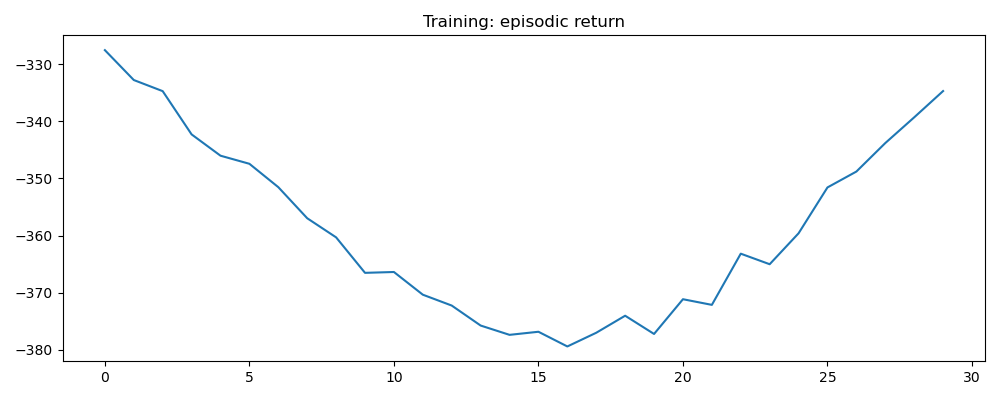

#### single_sens_3bps\train_entropy_curve.png

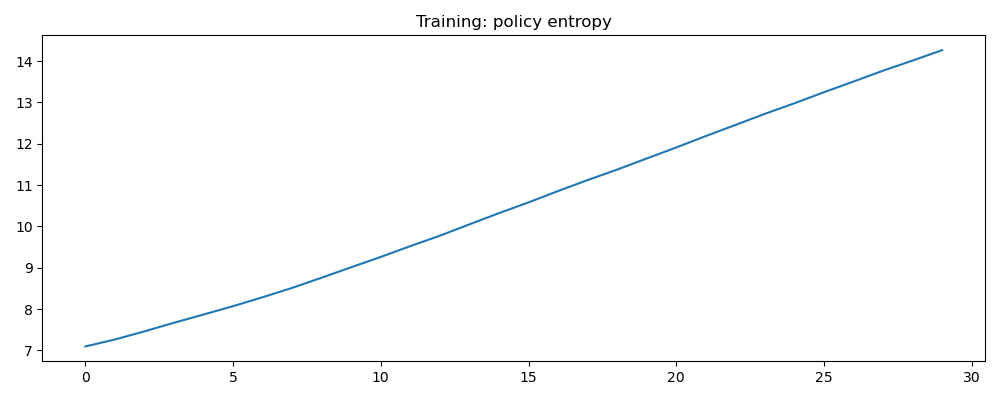

#### single_sens_3bps\single_equity.png

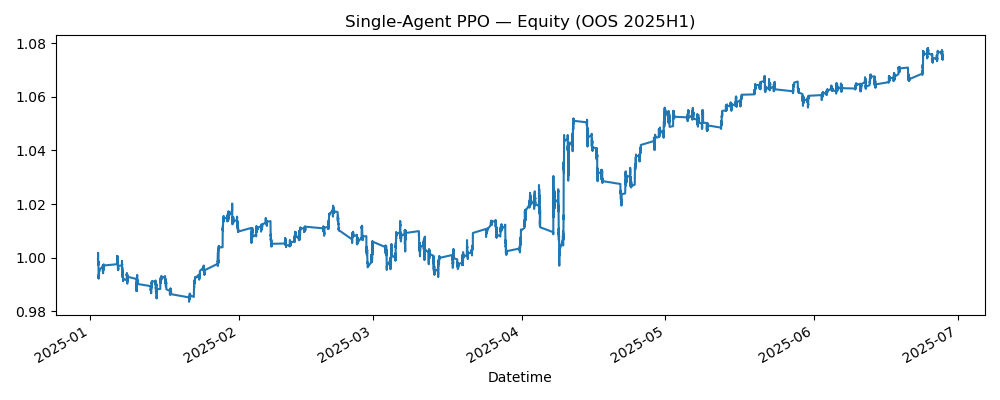

#### single_sens_3bps\single_drawdown.png

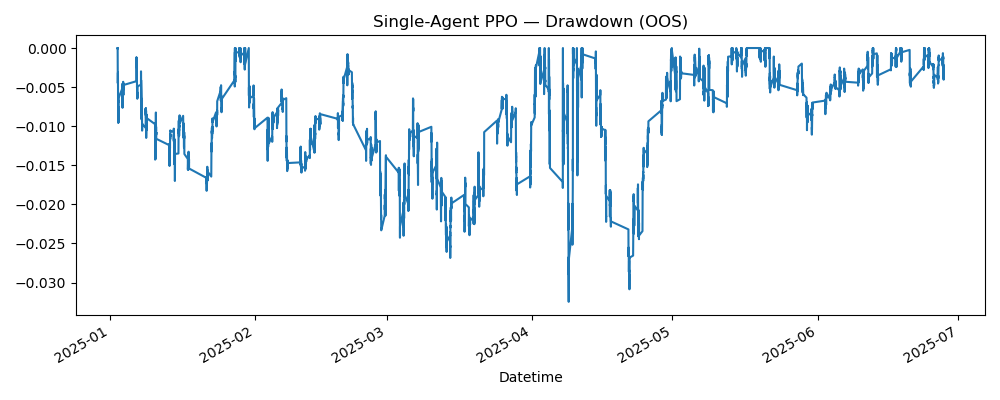

#### single_sens_3bps\single_turnover.png

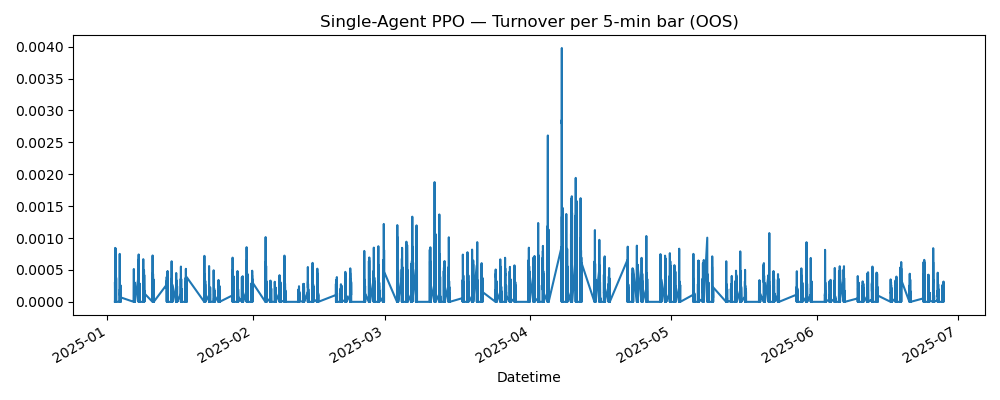

#### single_sens_3bps\single_exposure_heatmap.png

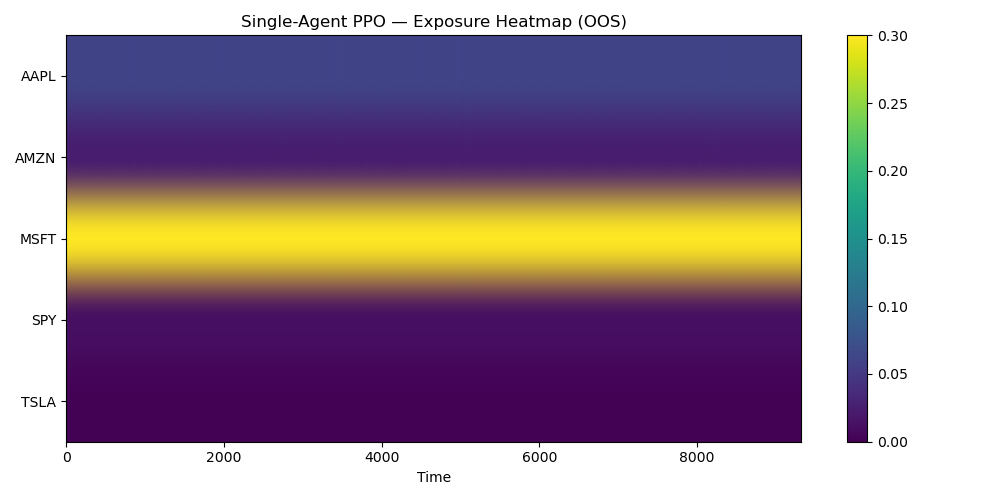

#### single_sens_3bps\single_metrics.txt

Sharpe=1.865, Sortino=2.584, MaxDD=0.032
PSR(>0)=0.902, DSR~(N=10, rho=0.5)=0.648, Bootstrap-p(one-sided)=0.092



#### single_sens_3bps\returns_oos.csv

,Datetime,ret
0,2025-01-02 14:35:00,-0.000803
1,2025-01-02 14:40:00,-0.000098
2,2025-01-02 14:45:00,0.001149
3,2025-01-02 14:50:00,0.000614
4,2025-01-02 14:55:00,0.000733
5,2025-01-02 15:00:00,-0.000062
6,2025-01-02 15:05:00,0.000070
7,2025-01-02 15:10:00,0.000238
8,2025-01-02 15:15:00,-0.000939
9,2025-01-02 15:20:00,-0.001915


#### single_sens_3bps\equity_oos.csv

,Datetime,Equity
0,2025-01-02 14:35:00,0.999197
1,2025-01-02 14:40:00,0.999099
2,2025-01-02 14:45:00,1.000247
3,2025-01-02 14:50:00,1.000861
4,2025-01-02 14:55:00,1.001595
5,2025-01-02 15:00:00,1.001533
6,2025-01-02 15:05:00,1.001603
7,2025-01-02 15:10:00,1.001841
8,2025-01-02 15:15:00,1.000900
9,2025-01-02 15:20:00,0.998983


#### single_sens_3bps\single_exposures.csv

,Datetime,AAPL,AMZN,MSFT,SPY,TSLA
0,2025-01-02 14:35:00,0.061013,0.023422,0.3,0.012184,0.001444
1,2025-01-02 14:40:00,0.061013,0.023422,0.3,0.012184,0.001444
2,2025-01-02 14:45:00,0.061013,0.023422,0.3,0.012184,0.001444
3,2025-01-02 14:50:00,0.060861,0.023326,0.3,0.012123,0.001443
4,2025-01-02 14:55:00,0.060861,0.023326,0.3,0.012123,0.001443
5,2025-01-02 15:00:00,0.060861,0.023326,0.3,0.012123,0.001443
6,2025-01-02 15:05:00,0.060950,0.023389,0.3,0.012150,0.001442
7,2025-01-02 15:10:00,0.060950,0.023389,0.3,0.012150,0.001442
8,2025-01-02 15:15:00,0.060950,0.023389,0.3,0.012150,0.001442
9,2025-01-02 15:20:00,0.061057,0.023393,0.3,0.012192,0.001468


#### single_sens_3bps\single_turnover_series.csv

,Datetime,0
0,2025-01-02 14:35:00,0.000000
1,2025-01-02 14:40:00,0.000000
2,2025-01-02 14:45:00,0.000000
3,2025-01-02 14:50:00,0.000310
4,2025-01-02 14:55:00,0.000000
5,2025-01-02 15:00:00,0.000000
6,2025-01-02 15:05:00,0.000180
7,2025-01-02 15:10:00,0.000000
8,2025-01-02 15:15:00,0.000000
9,2025-01-02 15:20:00,0.000179


#### single_sens_3bps\weights.csv

,Datetime,AAPL,AMZN,MSFT,SPY,TSLA
0,2025-01-02 14:35:00,0.061013,0.023422,0.3,0.012184,0.001444
1,2025-01-02 14:40:00,0.061013,0.023422,0.3,0.012184,0.001444
2,2025-01-02 14:45:00,0.061013,0.023422,0.3,0.012184,0.001444
3,2025-01-02 14:50:00,0.060861,0.023326,0.3,0.012123,0.001443
4,2025-01-02 14:55:00,0.060861,0.023326,0.3,0.012123,0.001443
5,2025-01-02 15:00:00,0.060861,0.023326,0.3,0.012123,0.001443
6,2025-01-02 15:05:00,0.060950,0.023389,0.3,0.012150,0.001442
7,2025-01-02 15:10:00,0.060950,0.023389,0.3,0.012150,0.001442
8,2025-01-02 15:15:00,0.060950,0.023389,0.3,0.012150,0.001442
9,2025-01-02 15:20:00,0.061057,0.023393,0.3,0.012192,0.001468


### MARL CTDE-PPO (MCP OFF, 5 bps)

#### marl_mcpOFF_5bps\train_return_curve.png

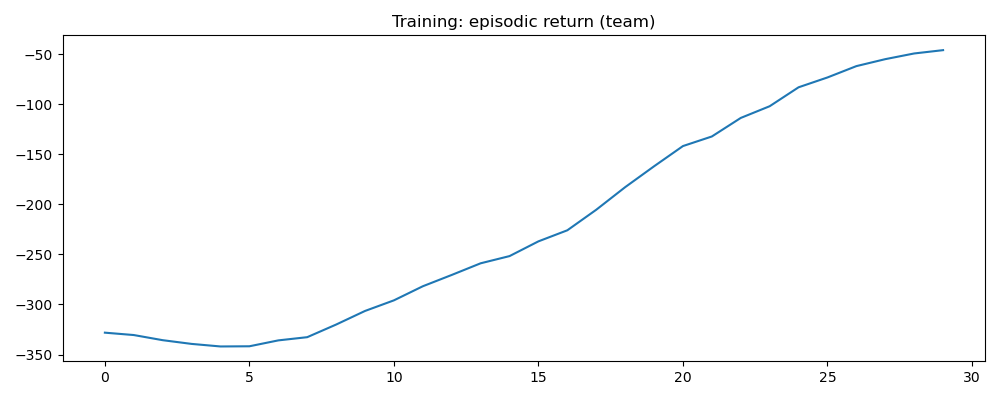

#### marl_mcpOFF_5bps\train_entropy_curve.png

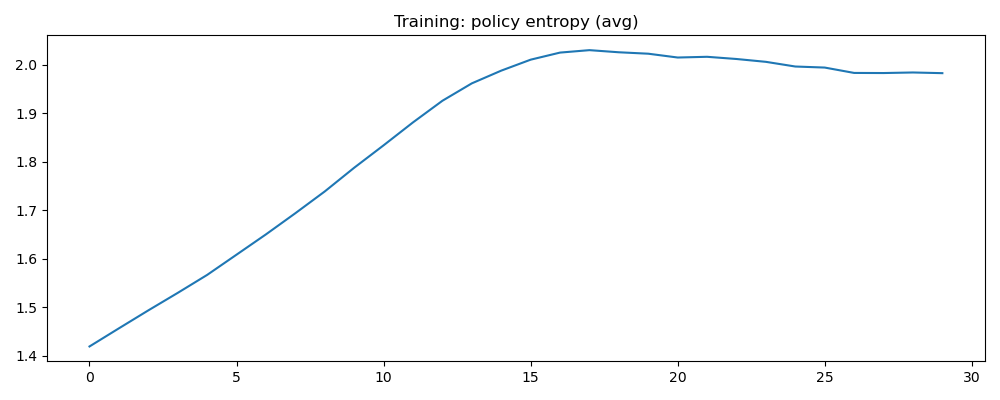

#### marl_mcpOFF_5bps\marl_equity.png

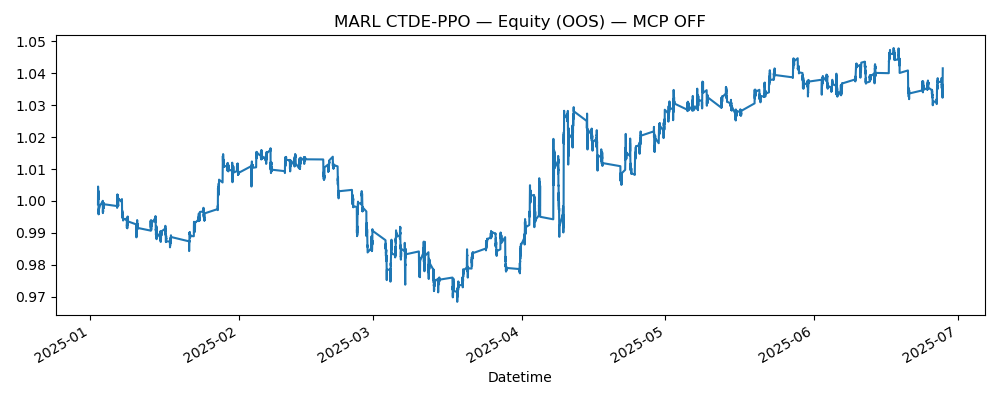

#### marl_mcpOFF_5bps\marl_drawdown.png

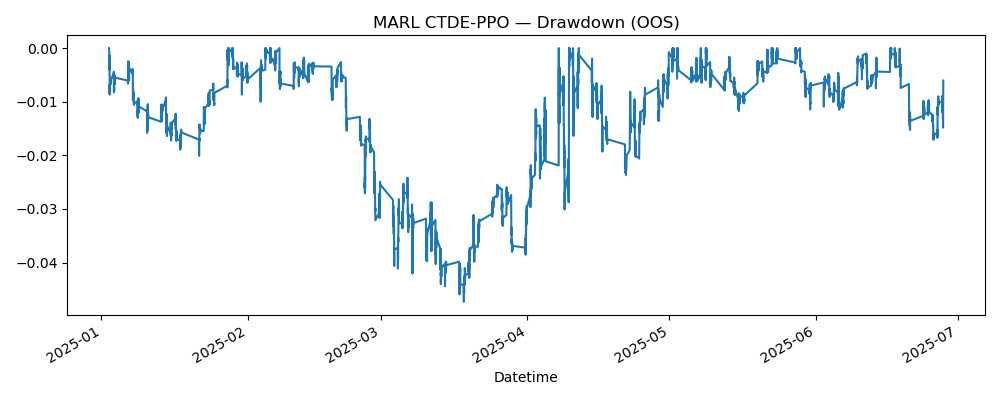

#### marl_mcpOFF_5bps\marl_turnover.png

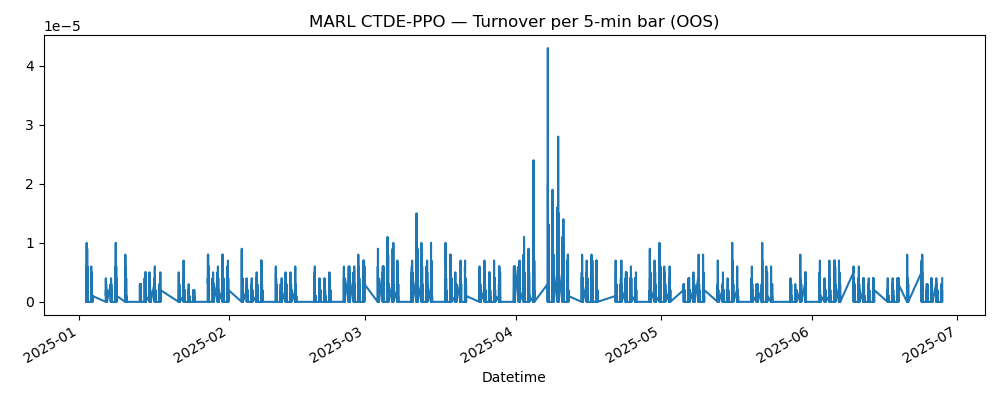

#### marl_mcpOFF_5bps\marl_exposure_heatmap.png

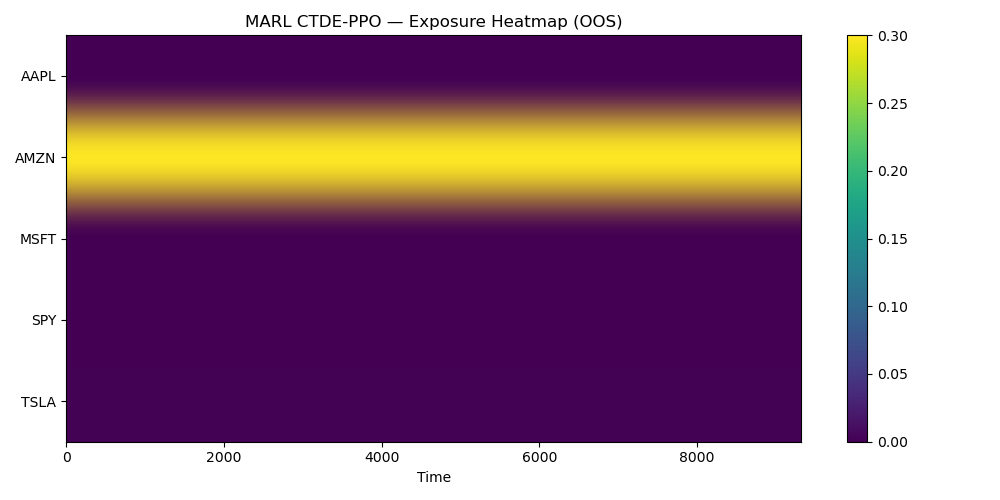

#### marl_mcpOFF_5bps\marl_exposure_corr.png

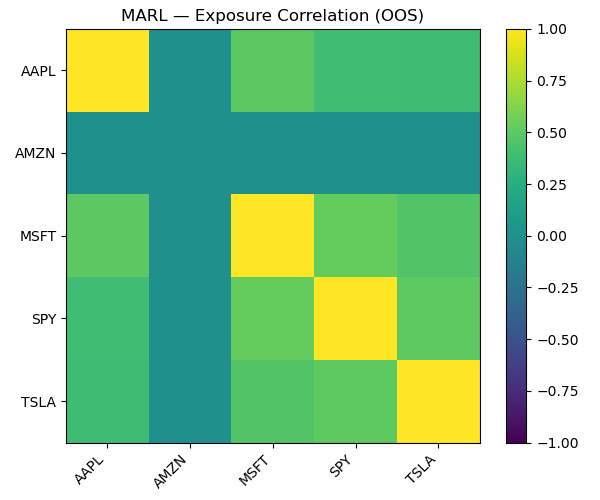

#### marl_mcpOFF_5bps\marl_metrics.txt

Sharpe=0.998, Sortino=1.370, MaxDD=0.047
PSR(>0)=0.755, DSR~(N=10, rho=0.5)=0.413, Bootstrap-p(one-sided)=0.277



#### marl_mcpOFF_5bps\returns_oos.csv

,Datetime,ret
0,2025-01-02 14:35:00,-0.001026
1,2025-01-02 14:40:00,0.000587
2,2025-01-02 14:45:00,0.001574
3,2025-01-02 14:50:00,0.001484
4,2025-01-02 14:55:00,0.000954
5,2025-01-02 15:00:00,0.000287
6,2025-01-02 15:05:00,-0.000377
7,2025-01-02 15:10:00,0.001034
8,2025-01-02 15:15:00,-0.001113
9,2025-01-02 15:20:00,-0.001861


#### marl_mcpOFF_5bps\equity_oos.csv

,Datetime,Equity
0,2025-01-02 14:35:00,0.998974
1,2025-01-02 14:40:00,0.999561
2,2025-01-02 14:45:00,1.001134
3,2025-01-02 14:50:00,1.002620
4,2025-01-02 14:55:00,1.003576
5,2025-01-02 15:00:00,1.003865
6,2025-01-02 15:05:00,1.003486
7,2025-01-02 15:10:00,1.004523
8,2025-01-02 15:15:00,1.003405
9,2025-01-02 15:20:00,1.001538


#### marl_mcpOFF_5bps\marl_exposures.csv

,Datetime,AAPL,AMZN,MSFT,SPY,TSLA
0,2025-01-02 14:35:00,0.000574,0.3,0.000497,0.000809,0.001496
1,2025-01-02 14:40:00,0.000574,0.3,0.000497,0.000809,0.001496
2,2025-01-02 14:45:00,0.000574,0.3,0.000497,0.000809,0.001496
3,2025-01-02 14:50:00,0.000574,0.3,0.000497,0.000809,0.001494
4,2025-01-02 14:55:00,0.000574,0.3,0.000497,0.000809,0.001494
5,2025-01-02 15:00:00,0.000574,0.3,0.000497,0.000809,0.001494
6,2025-01-02 15:05:00,0.000574,0.3,0.000496,0.000809,0.001493
7,2025-01-02 15:10:00,0.000574,0.3,0.000496,0.000809,0.001493
8,2025-01-02 15:15:00,0.000574,0.3,0.000496,0.000809,0.001493
9,2025-01-02 15:20:00,0.000575,0.3,0.000497,0.000809,0.001496


#### marl_mcpOFF_5bps\marl_turnover_series.csv

,Datetime,0
0,2025-01-02 14:35:00,0.000000
1,2025-01-02 14:40:00,0.000000
2,2025-01-02 14:45:00,0.000000
3,2025-01-02 14:50:00,0.000002
4,2025-01-02 14:55:00,0.000000
5,2025-01-02 15:00:00,0.000000
6,2025-01-02 15:05:00,0.000002
7,2025-01-02 15:10:00,0.000000
8,2025-01-02 15:15:00,0.000000
9,2025-01-02 15:20:00,0.000005


#### marl_mcpOFF_5bps\marl_exposure_corr.csv

,Unnamed: 0,AAPL,AMZN,MSFT,SPY,TSLA
0,AAPL,1.000000,0.0,0.499157,0.389162,0.379559
1,AMZN,0.000000,0.0,0.000000,0.000000,0.000000
2,MSFT,0.499157,0.0,1.000000,0.528130,0.455551
3,SPY,0.389162,0.0,0.528130,1.000000,0.500413
4,TSLA,0.379559,0.0,0.455551,0.500413,1.000000


#### marl_mcpOFF_5bps\weights.csv

,Datetime,AAPL,AMZN,MSFT,SPY,TSLA
0,2025-01-02 14:35:00,0.000574,0.3,0.000497,0.000809,0.001496
1,2025-01-02 14:40:00,0.000574,0.3,0.000497,0.000809,0.001496
2,2025-01-02 14:45:00,0.000574,0.3,0.000497,0.000809,0.001496
3,2025-01-02 14:50:00,0.000574,0.3,0.000497,0.000809,0.001494
4,2025-01-02 14:55:00,0.000574,0.3,0.000497,0.000809,0.001494
5,2025-01-02 15:00:00,0.000574,0.3,0.000497,0.000809,0.001494
6,2025-01-02 15:05:00,0.000574,0.3,0.000496,0.000809,0.001493
7,2025-01-02 15:10:00,0.000574,0.3,0.000496,0.000809,0.001493
8,2025-01-02 15:15:00,0.000574,0.3,0.000496,0.000809,0.001493
9,2025-01-02 15:20:00,0.000575,0.3,0.000497,0.000809,0.001496


### MARL CTDE-PPO (MCP ON, 5 bps)

#### marl_mcpON_5bps\train_return_curve.png

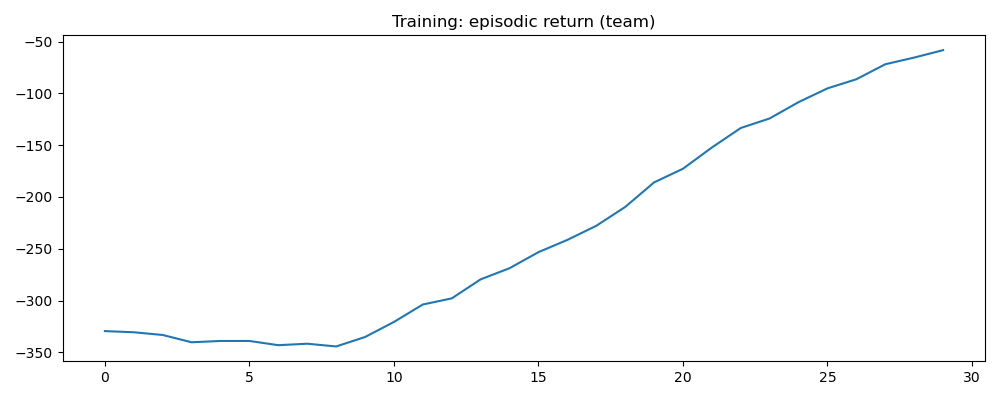

#### marl_mcpON_5bps\train_entropy_curve.png

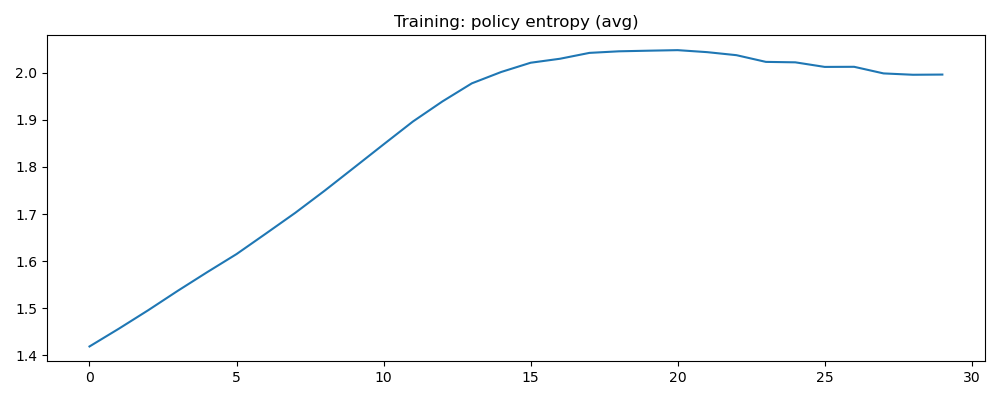

#### marl_mcpON_5bps\marl_equity.png

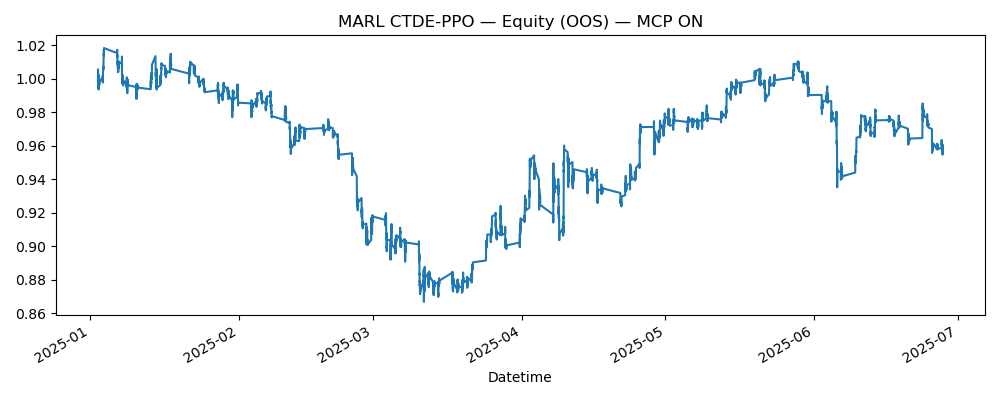

#### marl_mcpON_5bps\marl_drawdown.png

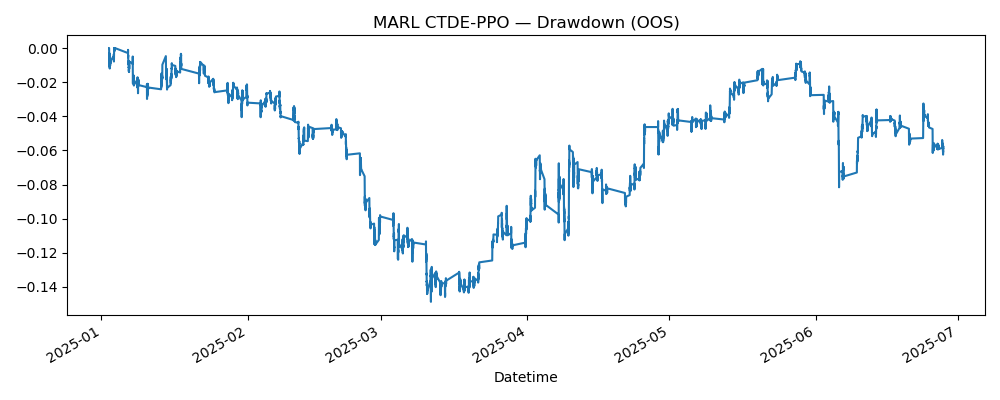

#### marl_mcpON_5bps\marl_turnover.png

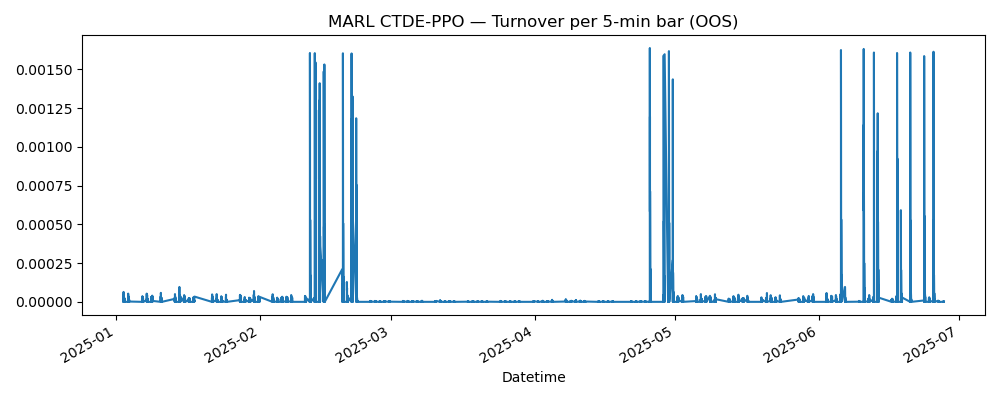

#### marl_mcpON_5bps\marl_exposure_heatmap.png

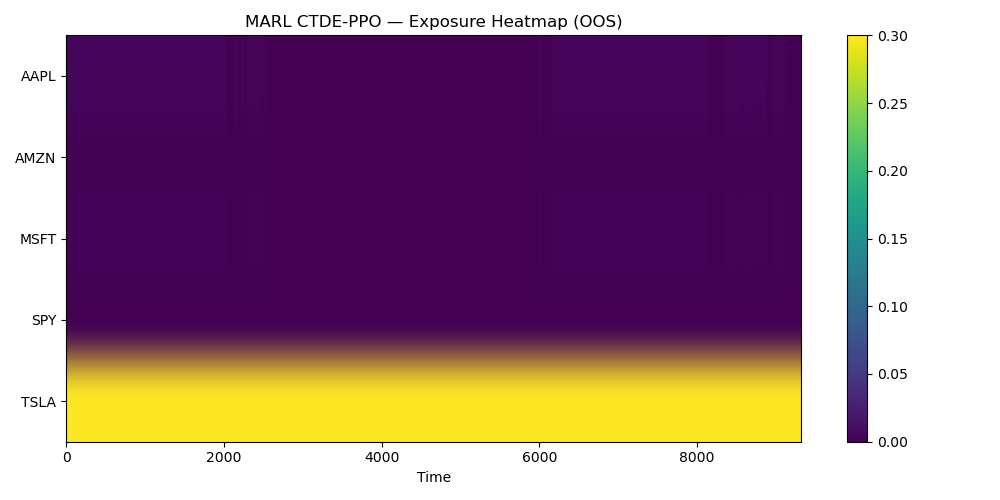

#### marl_mcpON_5bps\marl_exposure_corr.png

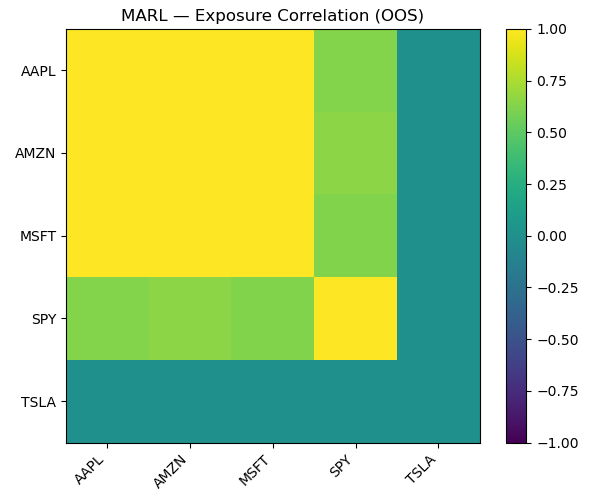

#### marl_mcpON_5bps\marl_metrics.txt

Sharpe=-0.436, Sortino=-0.606, MaxDD=0.149
PSR(>0)=0.382, DSR~(N=10, rho=0.5)=0.114, Bootstrap-p(one-sided)=0.627



#### marl_mcpON_5bps\returns_oos.csv

,Datetime,ret
0,2025-01-02 14:35:00,-0.001305
1,2025-01-02 14:40:00,0.003143
2,2025-01-02 14:45:00,0.003115
3,2025-01-02 14:50:00,0.000694
4,2025-01-02 14:55:00,-0.000382
5,2025-01-02 15:00:00,-0.001537
6,2025-01-02 15:05:00,0.001917
7,2025-01-02 15:10:00,-0.002193
8,2025-01-02 15:15:00,-0.002791
9,2025-01-02 15:20:00,-0.001217


#### marl_mcpON_5bps\equity_oos.csv

,Datetime,Equity
0,2025-01-02 14:35:00,0.998695
1,2025-01-02 14:40:00,1.001834
2,2025-01-02 14:45:00,1.004955
3,2025-01-02 14:50:00,1.005652
4,2025-01-02 14:55:00,1.005269
5,2025-01-02 15:00:00,1.003724
6,2025-01-02 15:05:00,1.005648
7,2025-01-02 15:10:00,1.003443
8,2025-01-02 15:15:00,1.000643
9,2025-01-02 15:20:00,0.999425


#### marl_mcpON_5bps\marl_exposures.csv

,Datetime,AAPL,AMZN,MSFT,SPY,TSLA
0,2025-01-02 14:35:00,0.005146,0.001677,0.003451,0.000762,0.3
1,2025-01-02 14:40:00,0.005146,0.001677,0.003451,0.000762,0.3
2,2025-01-02 14:45:00,0.005146,0.001677,0.003451,0.000762,0.3
3,2025-01-02 14:50:00,0.005140,0.001677,0.003447,0.000761,0.3
4,2025-01-02 14:55:00,0.005140,0.001677,0.003447,0.000761,0.3
5,2025-01-02 15:00:00,0.005140,0.001677,0.003447,0.000761,0.3
6,2025-01-02 15:05:00,0.005118,0.001671,0.003435,0.000759,0.3
7,2025-01-02 15:10:00,0.005118,0.001671,0.003435,0.000759,0.3
8,2025-01-02 15:15:00,0.005118,0.001671,0.003435,0.000759,0.3
9,2025-01-02 15:20:00,0.005139,0.001672,0.003442,0.000761,0.3


#### marl_mcpON_5bps\marl_turnover_series.csv

,Datetime,0
0,2025-01-02 14:35:00,0.000000
1,2025-01-02 14:40:00,0.000000
2,2025-01-02 14:45:00,0.000000
3,2025-01-02 14:50:00,0.000011
4,2025-01-02 14:55:00,0.000000
5,2025-01-02 15:00:00,0.000000
6,2025-01-02 15:05:00,0.000042
7,2025-01-02 15:10:00,0.000000
8,2025-01-02 15:15:00,0.000000
9,2025-01-02 15:20:00,0.000031


#### marl_mcpON_5bps\marl_exposure_corr.csv

,Unnamed: 0,AAPL,AMZN,MSFT,SPY,TSLA
0,AAPL,1.000000,0.997678,0.999723,0.627536,0.0
1,AMZN,0.997678,1.000000,0.997774,0.651523,0.0
2,MSFT,0.999723,0.997774,1.000000,0.624767,0.0
3,SPY,0.627536,0.651523,0.624767,1.000000,0.0
4,TSLA,0.000000,0.000000,0.000000,0.000000,0.0


#### marl_mcpON_5bps\weights.csv

,Datetime,AAPL,AMZN,MSFT,SPY,TSLA
0,2025-01-02 14:35:00,0.005146,0.001677,0.003451,0.000762,0.3
1,2025-01-02 14:40:00,0.005146,0.001677,0.003451,0.000762,0.3
2,2025-01-02 14:45:00,0.005146,0.001677,0.003451,0.000762,0.3
3,2025-01-02 14:50:00,0.005140,0.001677,0.003447,0.000761,0.3
4,2025-01-02 14:55:00,0.005140,0.001677,0.003447,0.000761,0.3
5,2025-01-02 15:00:00,0.005140,0.001677,0.003447,0.000761,0.3
6,2025-01-02 15:05:00,0.005118,0.001671,0.003435,0.000759,0.3
7,2025-01-02 15:10:00,0.005118,0.001671,0.003435,0.000759,0.3
8,2025-01-02 15:15:00,0.005118,0.001671,0.003435,0.000759,0.3
9,2025-01-02 15:20:00,0.005139,0.001672,0.003442,0.000761,0.3


### Summary metrics

#### summary_metrics.csv

,Unnamed: 0,Sharpe,Sortino,MaxDD,PSR,DSR,p_boot
0,Single 5bps,0.988070,1.354123,0.048777,0.752455,0.410393,0.278
1,Single 3bps,1.864594,2.583647,0.032465,0.902180,0.648261,0.092
2,MARL MCP OFF 5bps,0.998139,1.370353,0.047328,0.754634,0.413104,0.277
3,MARL MCP ON 5bps,-0.436028,-0.606488,0.148728,0.382122,0.114064,0.627


### Table 4.1 (full metrics)

#### table_4_1_full_metrics.csv

,Strategy,CumReturn,AnnVol,Sharpe,Sortino,MaxDD,PSR,DSR,p_boot,TurnoverCum,CostCum
0,EW,0.055437,0.251124,0.578497,0.78780,0.135478,0.655276,0.421736,0.358,1.000000,0.000500
1,InvVol,0.085207,0.209639,0.932021,1.26013,0.099199,0.740721,0.518694,0.271,0.930008,0.000465
2,MinVar,0.055437,0.251124,0.578497,0.78780,0.135478,0.655276,0.421736,0.358,1.000000,0.000500
3,Single-Agent PPO (5bps),0.042179,0.092523,0.988000,1.35400,0.049000,NaN,NaN,NaN,0.428843,0.000214
4,MARL+MCP (5bps),-0.040405,0.167398,-0.436000,-0.60600,0.149000,NaN,NaN,NaN,0.207867,0.000104
5,"MARL (no MCP, 5bps)",0.041549,0.090089,0.998000,1.37000,0.047000,NaN,NaN,NaN,0.006921,0.000003


### Combined equity (Figure 4.1)

#### fig_4_1_equity_all.png

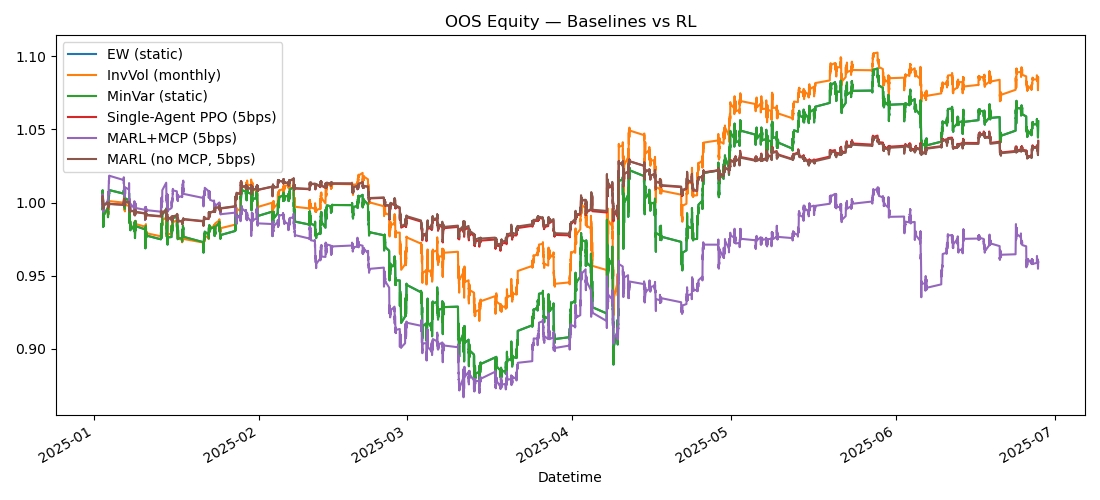

### Write-up notes


Design notes:

- Data: Bloomberg EDU, 5-min OHLCV, Jan-2024 to Jun-2025, assets per provided sheets.
- Split: Train < 2025-01-01, Test = 2025-01-01..2025-06-30.
- Constraints: per-asset cap = 0.30; Σw ≤ 1 with cash.
- Costs: main 5.0 bps (sens 3.0 bps). Bootstrap block=78 bars (~1 day).
- Baselines: EW (static), MinVar (static from train cov), InvVol (monthly rebalanced, targets from train vol). All capped at rebalance targets; weights drift between rebalances.
- RL: PPO with GAE; Actor (256,128), Critic (256,256,128), clip=0.2, entropy=0.01, minibatch=1024, 10 epochs/update.
- CTDE MARL: central critic over joint obs; per-asset actors.
- MCP: binary context alerts with TTL≈30 min — Turnover Alert=1 if prior-hour turnover>50%; Drawdown Alert=1 if running drawdown>5%.
- Trading frictions mitigation: HOLD_N=3 (15 min), action smoothing α=0.2, turnover penalty λ=0.5.
- Diagnostics saved: equity, drawdown, exposure heatmaps, MARL exposure-corr, turnover, training curves; summary metrics; 

In [1]:
import os
from pathlib import Path
from datetime import datetime

# ---- Safe plotting + threads (prevents GUI issues) ----
os.environ["MPLBACKEND"] = "Agg"
os.environ["MPLCONFIGDIR"] = str(Path("./.mpl-cache").resolve())
Path(os.environ["MPLCONFIGDIR"]).mkdir(parents=True, exist_ok=True)
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
os.environ["PYTHONIOENCODING"] = "utf-8"

# ---- User config (edit Excel filename if needed) ----
EXCEL_PATH = "jan2024_jun2025.xlsx"     # auto-detects any *.xlsx if this exact name is missing
RESULTS_DIR = "results"

MAIN_COST_BPS = 5.0                      # main analysis @ 5 bps
SENS_COST_BPS = 3.0                      # sensitivity @ 3 bps
CAP_PER_ASSET = 0.30                     # long-only per-asset cap at rebalance targets
LOOKBACK_BARS = 12                       # 12×5min = 1 hour context
EPOCHS = 30                              # increase if you have time/compute
TRAIN_TEST_SPLIT = ("2025-01-01", "2025-06-30")  # Train < Jan-1-2025; Test = 2025-H1
RANDOM_SEED = 42
BOOT_B = 1000                            # bootstrap replicates
BOOT_BLOCK = 78                          # block length (bars) = ~1 trading day

# ---- Python imports (no torch here) ----
import math, random, gc, warnings, re
import numpy as np
import pandas as pd
import matplotlib; matplotlib.use("Agg")
import matplotlib.pyplot as plt
from tqdm import trange
from dataclasses import dataclass
from scipy.optimize import minimize
from scipy.stats import skew, kurtosis, norm

warnings.filterwarnings("ignore", category=FutureWarning)

# ---- Output run folder ----
RUN_DIR = Path(RESULTS_DIR) / ("run_" + datetime.now().strftime("%Y%m%d_%H%M%S"))
RUN_DIR.mkdir(parents=True, exist_ok=True)
print(f"[RUN DIR] {RUN_DIR.resolve()}")

# %% [markdown]
# 1) Utilities (seeds, metrics, significance, turnover, caps, writers)

# %%
def set_global_seed(seed: int):
    random.seed(seed); np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

set_global_seed(RANDOM_SEED)

# 5-min annualisation
BARS_PER_DAY = 78
TRADING_DAYS_PER_YEAR = 252
BARS_PER_YEAR = BARS_PER_DAY * TRADING_DAYS_PER_YEAR

def sharpe_ratio(r: np.ndarray) -> float:
    r = np.asarray(r, dtype=float)
    mu = np.nanmean(r); sd = np.nanstd(r, ddof=1)
    return np.nan if (sd == 0 or np.isnan(sd)) else (mu / sd) * math.sqrt(BARS_PER_YEAR)

def sortino_ratio(r: np.ndarray) -> float:
    r = np.asarray(r, dtype=float)
    dr = r[r < 0]; ds = np.nanstd(dr, ddof=1); mu = np.nanmean(r)
    return np.nan if (ds == 0 or np.isnan(ds)) else (mu / ds) * math.sqrt(BARS_PER_YEAR)

def max_drawdown(equity: np.ndarray) -> float:
    """
    Returns positive peak-to-trough drawdown (e.g., 0.23 means -23%).
    """
    eq = np.asarray(equity, dtype=float)
    if eq.size == 0:
        return 0.0
    peak = np.maximum.accumulate(eq)
    dd = (peak - eq) / peak
    return float(np.nanmax(dd))

def drawdown_curve(equity: pd.Series) -> pd.Series:
    roll = equity.cummax()
    return equity / roll - 1.0

def cap_project(w, cap=0.30):
    """
    Project raw action vector w onto the long-only capped simplex:
      - w_i in [0, cap]
      - sum(w) ≤ 1 (cash allowed)
    """
    w = np.asarray(w, dtype=float).ravel()
    w = np.clip(w, 0.0, cap)
    s = w.sum()
    if s <= 0:
        return np.ones_like(w) / len(w)
    if s > 1.0:
        w = w / s
    return w

def probabilistic_sharpe_ratio(r: np.ndarray, sr_benchmark: float = 0.0) -> float:
    r = np.asarray(r, dtype=float); n = len(r)
    if n < 3: return np.nan
    sr_bar = sharpe_ratio(r) / math.sqrt(BARS_PER_YEAR)
    g3 = skew(r, bias=False); g4 = kurtosis(r, fisher=False, bias=False)
    den = math.sqrt(max(1e-12, 1 - g3*sr_bar + ((g4 - 1.0)/4.0)*(sr_bar**2)))
    z = ((sr_bar - sr_benchmark) * math.sqrt(n - 1)) / den
    return float(norm.cdf(z))

def deflated_sharpe_ratio(r: np.ndarray, n_trials: int = 10, rho: float = 0.5) -> float:
    r = np.asarray(r, dtype=float); n = len(r)
    if n < 3: return np.nan
    sr_bar = sharpe_ratio(r) / math.sqrt(BARS_PER_YEAR)
    g3 = skew(r, bias=False); g4 = kurtosis(r, fisher=False, bias=False)
    den = math.sqrt(max(1e-12, 1 - g3*sr_bar + ((g4 - 1.0)/4.0)*(sr_bar**2)))
    z_star = norm.ppf(1 - 1.0 / max(2, n_trials)) * math.sqrt(max(1e-6, 1 - rho))
    sr_star = z_star / math.sqrt(n - 1)
    z = ((sr_bar - sr_star) * math.sqrt(n - 1)) / den
    return float(norm.cdf(z))

def sharpe_block_bootstrap_pvalue(r: np.ndarray, B: int = 1000, block: int = 20, sr_benchmark: float = 0.0) -> float:
    r = np.asarray(r, dtype=float); n = len(r)
    if n < 3: return np.nan
    starts = np.arange(0, n - block + 1)
    if len(starts) == 0: return np.nan
    blocks = np.array([r[s:s+block] for s in starts])
    srs = []
    rng = np.random.default_rng(123)
    for _ in range(B):
        k = int(np.ceil(n / block))
        idx = rng.integers(0, len(blocks), size=k)
        samp = np.concatenate(blocks[idx], axis=0)[:n]
        srs.append(sharpe_ratio(samp) / math.sqrt(BARS_PER_YEAR))
    srs = np.array(srs)
    return float((srs <= sr_benchmark).mean())

def turnover_from_weights(W: pd.DataFrame) -> pd.Series:
    dW = W.diff().abs()
    return dW.sum(axis=1).fillna(0.0)
    
def _write_single_metrics(outdir, sr, so, mdd, psr, dsr, p_boot, n_trials, rho):
    with open(outdir / "single_metrics.txt", "w", encoding="utf-8") as f:
        f.write(f"Sharpe={sr:.3f}, Sortino={so:.3f}, MaxDD={mdd:.3f}\n")
        f.write(f"PSR(>0)={psr:.3f}, DSR~(N={n_trials}, rho={rho})={dsr:.3f}, Bootstrap-p(one-sided)={p_boot:.3f}\n")
    _dump_json_metrics(Path(outdir), {
        "Sharpe":sr,"Sortino":so,"MaxDD":mdd,"PSR":psr,"DSR":dsr,"p_boot":p_boot,
        "n_trials":n_trials, "rho":rho
    })
    print(f"[SINGLE] OOS Sharpe={sr:.3f}  Sortino={so:.3f}  MaxDD={mdd:.3f}  |  PSR={psr:.3f}  DSR~={dsr:.3f}  p_boot={p_boot:.3f}")

def _write_marl_metrics(outdir, sr, so, mdd, psr, dsr, p_boot, n_trials, rho, use_ctx):
    with open(outdir / "marl_metrics.txt", "w", encoding="utf-8") as f:
        f.write(f"Sharpe={sr:.3f}, Sortino={so:.3f}, MaxDD={mdd:.3f}\n")
        f.write(f"PSR(>0)={psr:.3f}, DSR~(N={n_trials}, rho={rho})={dsr:.3f}, Bootstrap-p(one-sided)={p_boot:.3f}\n")
    _dump_json_metrics(Path(outdir), {
        "Sharpe":sr,"Sortino":so,"MaxDD":mdd,"PSR":psr,"DSR":dsr,"p_boot":p_boot,
        "n_trials":n_trials, "rho":rho, "use_ctx":bool(use_ctx)
    })
    onoff = "ON" if use_ctx else "OFF"
    print(f"[MARL {onoff}] OOS Sharpe={sr:.3f}  Sortino={so:.3f}  MaxDD={mdd:.3f}  |  PSR={psr:.3f}  DSR~={dsr:.3f}  p_boot={p_boot:.3f}")

import json

def _dump_json_metrics(outdir: Path, d: dict):
    with open(outdir / "metrics.json", "w", encoding="utf-8") as f:
        json.dump(d, f, indent=2)

def _append_train_logs(log_file: Path, value: float):
    with open(log_file, "a", encoding="utf-8") as f:
        f.write(str(float(value)) + "\n")

def _plot_train_curves(outdir: Path, title_prefix: str = ""):
    import pandas as _pd
    # entropy
    p = outdir / "train_entropy_curve.csv"
    if p.exists():
        s = _pd.read_csv(p, header=None).iloc[:,0]
        fig = plt.figure(figsize=(10,4)); s.plot()
        plt.title(f"{title_prefix}Training: policy entropy (avg)")
        plt.tight_layout(); fig.savefig(outdir / "train_entropy_curve.png"); plt.close(fig)
    # episodic return
    p = outdir / "train_return_curve.csv"
    if p.exists():
        s = _pd.read_csv(p, header=None).iloc[:,0]
        fig = plt.figure(figsize=(10,4)); s.plot()
        plt.title(f"{title_prefix}Training: episodic return")
        plt.tight_layout(); fig.savefig(outdir / "train_return_curve.png"); plt.close(fig)

# 2) Excel → Clean OHLCV (robust Bloomberg EDU parser) + EDA
from pandas import ExcelFile

def _parse_bloomberg_sheet(xls: ExcelFile, sheet_name: str) -> pd.DataFrame:
    raw = xls.parse(sheet_name, header=None)
    header_idx = None
    for i in range(min(30, len(raw))):
        v = raw.iloc[i, 0]
        if isinstance(v, str) and v.strip().lower() == "dates":
            header_idx = i; break
    if header_idx is None:
        raise ValueError(f"'Dates' header not found in sheet: {sheet_name}")

    headers = raw.iloc[header_idx].tolist()
    df = raw.iloc[header_idx + 1:].copy()
    df.columns = headers

    cmap = {str(c).lower().strip(): c for c in df.columns}
    def pick(*names):
        for n in names:
            if n in cmap: return cmap[n]
        return None

    dtc = pick("dates","date time","datetime","date","time")
    oc  = pick("open")
    hc  = pick("high")
    lc  = pick("low")
    cc  = pick("px last","close","last price","last")
    vc  = pick("volume","tot volume")

    out = pd.DataFrame({
        "Datetime": pd.to_datetime(df[dtc], errors="coerce"),
        "Open":    pd.to_numeric(df[oc], errors="coerce"),
        "High":    pd.to_numeric(df[hc], errors="coerce"),
        "Low":     pd.to_numeric(df[lc], errors="coerce"),
        "Close":   pd.to_numeric(df[cc], errors="coerce"),
        "Volume":  pd.to_numeric(df[vc], errors="coerce"),
    })
    out["Ticker"] = sheet_name.split()[0]
    out = out.dropna(subset=["Datetime","Close"]).sort_values("Datetime")
    return out[["Ticker","Datetime","Open","High","Low","Close","Volume"]]

def excel_to_clean_df(xlsx_path: str) -> pd.DataFrame:
    assert Path(xlsx_path).exists(), f"Excel not found at {xlsx_path}"
    xls = ExcelFile(xlsx_path)
    frames = [_parse_bloomberg_sheet(xls, s) for s in xls.sheet_names]
    ohlcv = pd.concat(frames, ignore_index=True)
    return ohlcv

# --- Run preprocessing ---
if not Path(EXCEL_PATH).exists():
    candidates = list(Path(".").glob("*.xlsx"))
    if candidates:
        EXCEL_PATH = str(candidates[0])
        print(f"[INFO] Falling back to detected Excel: {EXCEL_PATH}")
    else:
        raise FileNotFoundError("Excel not found. Place your xlsx next to the notebook or update EXCEL_PATH.")

ohlcv = excel_to_clean_df(EXCEL_PATH)
clean_csv = RUN_DIR / "ohlcv_5min.csv"
ohlcv.to_csv(clean_csv, index=False)
print(f"[OK] Cleaned CSV -> {clean_csv}")
ohlcv.head()


# 2.1) EDA (audit + core plots)

# %%
def run_eda(ohlcv_df: pd.DataFrame, outdir: Path,
            split_start="2025-01-01", split_end="2025-06-30",
            max_plot_assets=12, skip_corr_if_many=True):
    outdir.mkdir(parents=True, exist_ok=True)
    df = ohlcv_df.copy()
    df["Ticker"] = df["Ticker"].astype("category")
    for col in ["Open","High","Low","Close","Volume"]:
        df[col] = pd.to_numeric(df[col], errors="coerce").astype("float32")

    assets = sorted(df["Ticker"].cat.categories.tolist())
    print(f"[EDA] assets={len(assets)}")
    panel = (df.pivot_table(index="Datetime", columns="Ticker", values="Close")
               .sort_index().astype("float32"))

    # ---- Audit summary ----
    rows=[]
    for t in assets:
        d = df[df["Ticker"] == t]
        days = d["Datetime"].dt.date.nunique()
        bars = len(d)
        per_day = d.groupby(d["Datetime"].dt.date)["Datetime"].count()
        miss_ratio = 1 - (bars / max(1, days * BARS_PER_DAY))
        rows.append({"Ticker":t,
                     "Start": d["Datetime"].min(), "End": d["Datetime"].max(),
                     "TradingDays": int(days), "TotalBars": int(bars),
                     "MeanBars/Day": float(per_day.mean()),
                     "MedianBars/Day": float(per_day.median()),
                     "MissingBarsRatio(est)": float(miss_ratio)})
    pd.DataFrame(rows).to_csv(outdir/"audit_summary.csv", index=False)
    print(f"[EDA] Audit -> {outdir/'audit_summary.csv'}")

    # ---- Plots ----
    plot_assets = assets[:max_plot_assets]
    norm = panel[plot_assets] / panel[plot_assets].iloc[0]
    fig = plt.figure(figsize=(10,4)); norm.plot(ax=plt.gca(), linewidth=1.0)
    plt.title("Normalized Close (start=1.0)"); plt.tight_layout()
    fig.savefig(outdir/"eda_normalized.png"); plt.close(fig)

    rets = panel.pct_change(fill_method=None).replace([np.inf,-np.inf], np.nan).dropna()
    fig = plt.figure(figsize=(10,4))
    for a in plot_assets: rets[a].hist(bins=80, alpha=0.35)
    plt.title("Distribution of 5-minute Returns"); plt.xlabel("Return"); plt.ylabel("Frequency")
    plt.tight_layout(); fig.savefig(outdir/"eda_return_hist.png"); plt.close(fig)

    ra = rets[plot_assets].abs()
    ra["minute_of_day"] = ra.index.hour * 60 + ra.index.minute
    profile = ra.groupby("minute_of_day").mean().mean(axis=1)
    fig = plt.figure(figsize=(10,4)); profile.plot()
    plt.title("Average |5-min Return| by Minute-of-Day"); plt.tight_layout()
    fig.savefig(outdir/"eda_intraday_profile.png"); plt.close(fig)
    del ra; gc.collect()

    if (not skip_corr_if_many) or (len(assets) <= 100):
        corr_train = rets.loc[rets.index < split_start, assets].corr()
        corr_test  = rets.loc[(rets.index >= split_start) & (rets.index <= split_end), assets].corr()
        for name, C in [("train",corr_train), ("test",corr_test)]:
            fig = plt.figure(figsize=(6,5))
            im = plt.imshow(C.values, vmin=-1, vmax=1); plt.colorbar()
            plt.xticks(range(len(assets)), assets, rotation=45, ha="right")
            plt.yticks(range(len(assets)), assets)
            plt.title(f"Return Correlation — {name.upper()}"); plt.tight_layout()
            fig.savefig(outdir/f"eda_corr_{name}.png"); plt.close(fig)
        del corr_train, corr_test
    else:
        print(f"[EDA] Skipping correlation heatmaps for {len(assets)} assets.")

    gc.collect()
    return panel, assets

panel_close, asset_list = run_eda(ohlcv, RUN_DIR, split_start=TRAIN_TEST_SPLIT[0], split_end=TRAIN_TEST_SPLIT[1])


# 3) Baselines (EW static, MinVar static, InvVol monthly rebalanced) — cost-aware

# %%
def weights_equal(n): 
    return np.ones(n)/n

def weights_invvol(vol: pd.Series):
    iv = 1.0 / vol.replace(0, np.nan)
    iv = iv.fillna(0.0).values
    if iv.sum() == 0: iv = np.ones_like(iv)
    return iv / iv.sum()

def weights_minvar(cov: pd.DataFrame):
    n = cov.shape[0]; C = cov.values
    def obj(w): return float(w @ C @ w)
    cons = [{'type':'eq','fun': lambda w: np.sum(w) - 1.0}]
    bnds = [(0,1)] * n
    x0 = np.ones(n) / n
    res = minimize(obj, x0, bounds=bnds, constraints=cons, method='SLSQP', options={'maxiter':200})
    return res.x if res.success else x0

def simulate_static(rets: pd.DataFrame, w: np.ndarray, cost_per_unit: float):
    """
    Buy-and-hold OOS with one-time entry cost (charged at t0 in the first bar).
    Weights drift continuously (self-financing) between rebalances.
    """
    pr = []
    w_curr = np.array(w, dtype=float).copy()

    for i in range(len(rets)):
        r_vec = rets.iloc[i].values
        port_ret = float(np.dot(w_curr, r_vec))
        pr.append(port_ret)

        # drift weights (self-financing)
        gross = w_curr * (1.0 + r_vec)
        denom = (1.0 + port_ret)
        if denom != 0.0:
            w_curr = gross / denom

    pr = pd.Series(pr, index=rets.index, name="ret")
    if len(pr) > 0:
        pr.iloc[0] -= cost_per_unit * float(np.abs(w).sum())  # <-- entry cost here
    eq = (1.0 + pr).cumprod()
    eq.name = "equity"
    return pr, eq

def simulate_monthly_rebalanced(rets: pd.DataFrame, w_fn, vol=None, cov=None,
                                cap=0.30, cost_per_unit=0.0005, method="invvol"):
    """Rebalance at month starts; apply costs when weights change. Returns (ret, equity, turnover_series)."""
    idx = rets.index
    # robust month key
    month_keys = idx.to_period("M").astype(str).values
    pr_list, eq_path, to_list = [], [], []
    eq = 1.0
    prev_w = np.zeros(rets.shape[1])  # start in cash

    for i in range(len(idx)):
        # rebalance at first bar of month
        if i == 0 or month_keys[i] != month_keys[i-1]:
            if method == "invvol":
                w = weights_invvol(vol)
            elif method == "minvar":
                w = weights_minvar(cov)
            elif method == "ew":
                w = weights_equal(rets.shape[1])
            else:
                w = weights_equal(rets.shape[1])

            w = cap_project(w, cap=cap)
            turnover = np.abs(w - prev_w).sum()
            if turnover > 0:
                eq *= (1.0 - cost_per_unit * turnover)
            prev_w = w.copy()
        else:
            turnover = 0.0

        r_bar = float(prev_w @ rets.iloc[i].values)
        pr_list.append(r_bar)
        eq *= (1.0 + r_bar)
        eq_path.append(eq)
        to_list.append(float(turnover))

    ret_s = pd.Series(pr_list, index=rets.index, name="ret")
    eq_s  = pd.Series(eq_path, index=rets.index, name="equity")
    to_s  = pd.Series(to_list, index=rets.index, name="turnover")
    return ret_s, eq_s, to_s

def save_baseline_weight_bars(vol, cov, assets, outdir: Path, cap=0.30):
    w_ew = cap_project(weights_equal(len(assets)), cap)
    w_iv = cap_project(weights_invvol(vol), cap)
    w_mv = cap_project(weights_minvar(cov), cap)
    combos = {
        "EW": w_ew,
        "InvVol": w_iv,
        "MinVar": w_mv,
    }
    for name, w in combos.items():
        fig = plt.figure(figsize=(7,3))
        plt.bar(assets, w); plt.xticks(rotation=45, ha="right"); plt.ylabel("Weight")
        plt.title(f"Baseline Weights — {name}"); plt.tight_layout()
        fig.savefig(outdir / f"wgt_{name.replace(' ','_')}.png"); plt.close(fig)
    return combos

def run_baselines(panel_close: pd.DataFrame, assets, cost_bps=5.0, cap=0.30, outdir: Path = RUN_DIR):
    """
    - EW: static buy-and-hold (entry cost only)
    - MinVar: static buy-and-hold (entry cost only)
    - InvVol: monthly rebalanced (costs at month boundaries)
    Saves: equity plots, metrics CSV, baseline turnover CSV for InvVol.
    """
    rets = panel_close.pct_change(fill_method=None).replace([np.inf, -np.inf], np.nan).dropna()
    train = rets.loc[rets.index < TRAIN_TEST_SPLIT[0], assets].dropna()
    test  = rets.loc[(rets.index >= TRAIN_TEST_SPLIT[0]) & (rets.index <= TRAIN_TEST_SPLIT[1]), assets].dropna()

    vol = train.std(); cov = train.cov()
    save_baseline_weight_bars(vol, cov, assets, outdir, cap=cap)

    base_defs = {
        "EW": cap_project(weights_equal(len(assets)), cap),
        "InvVol": cap_project(weights_invvol(vol), cap),
        "MinVar": cap_project(weights_minvar(cov), cap),
    }

    cost_per_unit = cost_bps / 10000.0
    rows = []
    for name, w in base_defs.items():
        if name == "InvVol":
            pr, eq, to = simulate_monthly_rebalanced(test, weights_invvol, vol=vol, cap=cap,
                                                     cost_per_unit=cost_per_unit, method="invvol")
            # save turnover for appendix
            to.to_csv(outdir / f"baseline_turnover_{name}.csv")
        else:
            pr, eq = simulate_static(test, w, cost_per_unit)
            # one-shot entry turnover series for static strategies
            to = pd.Series([float(np.sum(np.abs(w)))] + [0.0]*(len(eq)-1), index=eq.index, name="turnover")
            to.to_csv(outdir / f"baseline_turnover_{name}.csv")

        # plot equity
        fig = plt.figure(figsize=(10,4)); eq.plot()
        plt.title(f"Equity — {name}"); plt.tight_layout()
        fig.savefig(outdir / f"eq_{name.replace(' ','_')}.png"); plt.close(fig)

        # metrics
        rows.append({
            "Strategy": name,
            "Sharpe": sharpe_ratio(pr.values),
            "Sortino": sortino_ratio(pr.values),
            "MaxDD": max_drawdown(eq.values)
        })

    res = pd.DataFrame(rows).set_index("Strategy").sort_index()
    res_path = outdir / f"baselines_metrics_cost{int(cost_bps)}bps.csv"
    res.to_csv(res_path)
    print(f"[BASELINES] Metrics -> {res_path}")
    return res

baseline_main = run_baselines(panel_close, asset_list, cost_bps=MAIN_COST_BPS, cap=CAP_PER_ASSET, outdir=RUN_DIR)
baseline_sens = run_baselines(panel_close, asset_list, cost_bps=SENS_COST_BPS, cap=CAP_PER_ASSET, outdir=RUN_DIR)
baseline_main, baseline_sens

# 4) RL imports (Torch) + PPO building blocks

# %%
import torch
import torch.nn as nn
import torch.optim as optim

def mlp(sizes, act=nn.Tanh, out_act=None):
    layers=[]
    for i in range(len(sizes)-1):
        layers += [nn.Linear(sizes[i], sizes[i+1])]
        if i < len(sizes)-2:
            layers += [act()]
        elif out_act is not None:
            layers += [out_act()]
    return nn.Sequential(*layers)

class ActorContinuous(nn.Module):
    def __init__(self, obs_dim, act_dim):
        super().__init__()
        # per dissertation: (256,128)
        self.net = mlp([obs_dim, 256, 128, act_dim])
        self.log_std = nn.Parameter(torch.zeros(act_dim))
    def forward(self, obs):
        mu = self.net(obs); std = torch.exp(self.log_std)
        return mu, std
    def dist(self, obs):
        mu, std = self.forward(obs)
        return torch.distributions.Normal(mu, std)

class Critic(nn.Module):
    def __init__(self, obs_dim):
        super().__init__()
        # per dissertation: (256,256,128)
        self.v = mlp([obs_dim, 256, 256, 128, 1])
    def forward(self, obs):
        return self.v(obs).squeeze(-1)

@dataclass
class PPOConfig:
    gamma: float = 0.99
    lam: float = 0.95
    clip_ratio: float = 0.2
    pi_lr: float = 3e-4
    vf_lr: float = 3e-4
    train_iters: int = 10       # epochs/update
    target_kl: float = 0.02
    minibatch: int = 1024
    entropy_coef: float = 0.01
    device: str = "cpu"

def compute_gae(rews, vals, dones, cfg: PPOConfig):
    adv = np.zeros_like(rews); lastgaelam = 0.0
    for t in reversed(range(len(rews))):
        nonterminal = 1.0 - dones[t]
        delta = rews[t] + cfg.gamma * vals[t+1] * nonterminal - vals[t]
        lastgaelam = delta + cfg.gamma * cfg.lam * nonterminal * lastgaelam
        adv[t] = lastgaelam
    ret = adv + vals[:-1]
    return adv, ret

def ppo_update_actor(actor, data, cfg: PPOConfig):
    obs = torch.as_tensor(data["obs"], dtype=torch.float32, device=cfg.device)
    act = torch.as_tensor(data["act"], dtype=torch.float32, device=cfg.device)
    adv = torch.as_tensor(data["adv"], dtype=torch.float32, device=cfg.device)
    logp_old = torch.as_tensor(data["logp"], dtype=torch.float32, device=cfg.device)
    opt = optim.Adam(actor.parameters(), lr=cfg.pi_lr)
    for _ in range(cfg.train_iters):
        idx = torch.randperm(len(obs), device=cfg.device)
        for start in range(0, len(obs), cfg.minibatch):
            mb = idx[start:start+cfg.minibatch]
            d = actor.dist(obs[mb]); logp = d.log_prob(act[mb]).sum(-1)
            ratio = torch.exp(logp - logp_old[mb])
            surr1 = ratio * adv[mb]
            surr2 = torch.clamp(ratio, 1-cfg.clip_ratio, 1+cfg.clip_ratio) * adv[mb]
            pi_loss = -torch.min(surr1, surr2).mean()
            if cfg.entropy_coef:
                pi_loss -= cfg.entropy_coef * d.entropy().sum(-1).mean()
            opt.zero_grad(); pi_loss.backward(); opt.step()
            with torch.no_grad():
                kl = (logp_old[mb] - logp).mean().item()
            if kl > 1.5 * cfg.target_kl:
                break

def ppo_update_critic(critic, data, cfg: PPOConfig):
    obs = torch.as_tensor(data["obs"], dtype=torch.float32, device=cfg.device)
    ret = torch.as_tensor(data["ret"], dtype=torch.float32, device=cfg.device)
    opt = optim.Adam(critic.parameters(), lr=cfg.vf_lr)
    for _ in range(cfg.train_iters):
        idx = torch.randperm(len(obs), device=cfg.device)
        for start in range(0, len(obs), cfg.minibatch):
            mb = idx[start:start+cfg.minibatch]
            v = critic(obs[mb]); loss = ((v - ret[mb])**2).mean()
            opt.zero_grad(); loss.backward(); opt.step()

# 5) Environments + MCP (CTDE for MARL) with HOLD-N, smoothing, turnover penalty
HOLD_N = 3          # rebalance every 3 bars (15 minutes)
LAMBDA_TURN = 0.5   # extra penalty on turnover (beyond cost_bps)
ALPHA_ACT = 0.2     # action smoothing EMA (0=no smoothing; 0.2 is gentle)
LAMBDA_L1 = 0.002    # promotes sparse allocations
TURNOVER_EPS = 1e-6  # snap tiny TO to zero
ROUND_W = 6          # round weights to 6 decimals to kill float jitter


class MCPContextStore:
    def __init__(self, ttl_bars: int = 6*1):  # TTL ≈ 30 minutes at 5-min bars
        self.ttl = ttl_bars; self.t = 0; self._store = {}
    def put(self, key: str, value, ttl: int | None = None):
        exp = self.t + (ttl if ttl is not None else self.ttl); self._store[key] = (value, exp)
    def get(self, key: str, default=None):
        v = self._store.get(key, (default, -1)); return default if v[1] < self.t else v[0]
    def step(self):
        self.t += 1
        for k in list(self._store.keys()):
            if self._store[k][1] < self.t: del self._store[k]

class SingleAgentEnv:
    def __init__(self, rets: pd.DataFrame, assets, lookback=12, w_max=0.30, cost_per_unit=0.0005, daily_reset=False, use_ctx=True):
        self.rets = rets.copy(); self.assets = list(assets); self.n = len(assets)
        self.lookback = lookback; self.w_max = w_max; self.cost_per_unit = cost_per_unit
        self.daily_reset = daily_reset; self.use_ctx = use_ctx
        self.reset()

    def _obs(self):
        start = max(0, self.ptr - self.lookback)
        win = self.rets.iloc[start:self.ptr][self.assets]; arr = win.values
        if len(win) < self.lookback:
            pad = np.zeros((self.lookback - len(win), self.n)); arr = np.vstack([pad, arr])
        ctxv = np.array([
            self.ctx.get("turnover", 0.0) if self.use_ctx else 0.0,
            self.ctx.get("dd_alert", 0.0) if self.use_ctx else 0.0
        ])
        return np.concatenate([arr.flatten(), ctxv])

    def reset(self, start_index=None):
        self.ptr = 0 if start_index is None else self.rets.index.get_loc(start_index)
        self.step_no = 0
        self.ctx = MCPContextStore(ttl_bars=6)
        self.prev_w = None
        self.w = np.zeros(self.n)  # start with cash
        self.equity = 1.0
        # internal trackers for MCP
        from collections import deque
        self._to_roll = deque(maxlen=12)  # prior hour at 5-min bars
        self._equity_peak = 1.0
        return self._obs()
        
    def step(self, action: np.ndarray):
        proposed = np.clip(np.array(action, dtype=float), 0.0, self.w_max)
        if proposed.sum() > 1.0:
            proposed = proposed / proposed.sum()

    # Always initialize turnover for this bar (avoids UnboundLocalError)
        turnover = 0.0

        if (self.step_no % HOLD_N) == 0:
            if self.prev_w is not None:
                proposed = ALPHA_ACT * proposed + (1.0 - ALPHA_ACT) * self.prev_w
            w_new = cap_project(proposed, cap=self.w_max)
            w_new = np.round(w_new, ROUND_W)
            turnover = np.abs(w_new - self.w).sum()
            if turnover < TURNOVER_EPS:
                turnover = 0.0
            self.prev_w = w_new.copy()
            self.w = w_new

        r_vec = self.rets.iloc[self.ptr][self.assets].values
        port_ret = float(self.w @ r_vec)
        cost = self.cost_per_unit * turnover
        realized_ret = port_ret - cost
        reward = realized_ret - LAMBDA_TURN * turnover - LAMBDA_L1 * np.sum(np.abs(self.w))

        self.equity *= (1.0 + realized_ret)

    # --- MCP binary alerts (prior-hour turnover >50%; running DD >5%) ---
        self._to_roll.append(float(turnover))
        to_hour = sum(self._to_roll)
        turnover_alert = 1.0 if (to_hour > 0.50) else 0.0

        self._equity_peak = max(self._equity_peak, self.equity)
        curr_dd = (self._equity_peak - self.equity) / self._equity_peak
        dd_alert = 1.0 if (curr_dd > 0.05) else 0.0

        self.ctx.put("turnover", turnover_alert, ttl=6)
        self.ctx.put("dd_alert", dd_alert, ttl=6)

        done = False
        prev_day = self.rets.index[self.ptr].date()
        self.ptr += 1; self.step_no += 1; self.ctx.step()
        if self.ptr >= len(self.rets):
            done = True
        elif self.daily_reset and self.rets.index[self.ptr].date() != prev_day:
            done = True

        obs = None if done else self._obs()
        info = {
    "equity": self.equity,
    "turnover": float(turnover),
    "cost": float(cost),
    "weights": self.w.copy(),
    "realized_ret": float(realized_ret)   # <-- add this
}

        return obs, reward, done, info
        
class MultiAgentTeamEnv:
    def __init__(self, rets: pd.DataFrame, assets, lookback=12, w_max=0.30, cost_per_unit=0.0005, daily_reset=False, use_ctx=True):
        self.rets = rets.copy(); self.assets = list(assets); self.n = len(assets)
        self.lookback = lookback; self.w_max = w_max; self.cost_per_unit = cost_per_unit
        self.daily_reset = daily_reset; self.use_ctx = use_ctx
        self.reset()

    def _obs_agent(self, i: int):
        start = max(0, self.ptr - self.lookback); s = self.assets[i]
        win = self.rets.iloc[start:self.ptr][s]; arr = win.values.reshape(-1, 1)
        if len(win) < self.lookback:
            pad = np.zeros((self.lookback - len(win), 1)); arr = np.vstack([pad, arr])
        ctxv = np.array([
            self.ctx.get("turnover", 0.0) if self.use_ctx else 0.0,
            self.ctx.get("dd_alert", 0.0) if self.use_ctx else 0.0
        ])
        return np.concatenate([arr.flatten(), ctxv])

    def critic_joint_obs(self):
        return np.concatenate([self._obs_agent(i) for i in range(self.n)], axis=0)

    def reset(self, start_index=None):
        self.ptr = 0 if start_index is None else self.rets.index.get_loc(start_index)
        self.step_no = 0
        self.ctx = MCPContextStore(ttl_bars=6)
        self.prev_w = None
        self.w = np.zeros(self.n)
        self.equity = 1.0
        from collections import deque
        self._to_roll = deque(maxlen=12)
        self._equity_peak = 1.0
        return {a: self._obs_agent(i) for i, a in enumerate(self.assets)}

    def step(self, action_dict):
        a = np.zeros(self.n)
        for i, s in enumerate(self.assets):
            a[i] = float(np.clip(action_dict.get(s, 0.0), 0.0, self.w_max))
        if a.sum() > 1.0:
            a = a / a.sum()

    # Always initialise turnover for this bar (avoids UnboundLocalError)
        turnover = 0.0

        if (self.step_no % HOLD_N) == 0:
            if self.prev_w is not None:
                a = ALPHA_ACT * a + (1.0 - ALPHA_ACT) * self.prev_w
            w_new = cap_project(a, cap=self.w_max)
            w_new = np.round(w_new, ROUND_W)
            turnover = np.abs(w_new - self.w).sum()
            if turnover < TURNOVER_EPS:
                turnover = 0.0
            self.prev_w = w_new.copy()
            self.w = w_new
    
        r_vec = self.rets.iloc[self.ptr][self.assets].values
        port_ret = float(self.w @ r_vec)
        cost = self.cost_per_unit * turnover
        realized_ret = port_ret - cost
        reward = realized_ret - LAMBDA_TURN * turnover - LAMBDA_L1 * np.sum(np.abs(self.w))
    
        self.equity *= (1.0 + realized_ret)
    
        # MCP (binary)
        self._to_roll.append(float(turnover))
        to_hour = sum(self._to_roll)
        turnover_alert = 1.0 if (to_hour > 0.50) else 0.0
        self._equity_peak = max(self._equity_peak, self.equity)
        curr_dd = (self._equity_peak - self.equity) / self._equity_peak
        dd_alert = 1.0 if (curr_dd > 0.05) else 0.0
    
        self.ctx.put("turnover", turnover_alert, ttl=6)
        self.ctx.put("dd_alert", dd_alert, ttl=6)
    
        done = False
        prev_day = self.rets.index[self.ptr].date()
        self.ptr += 1; self.step_no += 1; self.ctx.step()
        if self.ptr >= len(self.rets):
            done = True
        elif self.daily_reset and self.rets.index[self.ptr].date() != prev_day:
            done = True
    
        obs = None if done else {a: self._obs_agent(i) for i, a in enumerate(self.assets)}
        info = {
    "equity": self.equity,
    "turnover": float(turnover),
    "cost": float(cost),
    "weights": self.w.copy(),
    "realized_ret": float(realized_ret)   # <-- add this
}
        return obs, reward, done, info


# 6) Training functions (Single PPO & MARL CTDE-PPO) + training curves

# %%
def _weights_from_actor(a, cap=0.30):
    x = np.asarray(a, dtype=float)
    x = np.exp(x - np.max(x))           # stable
    w = x / x.sum()                     # simplex
    w = np.minimum(w, cap)              # enforce cap at target
    s = w.sum()
    if s == 0:
        return np.ones_like(w)/len(w)
    if s > 1.0:
        w = w / s                       # keep sum ≤ 1
    return w
def _scalar_to_weight(z, cap=0.30, bias=0.5, temp=0.75, floor=1e-4):
    # softplus((x-bias)*temp) encourages many near-zero weights
    x = float(np.ravel(z)[0])
    y = temp * (x - bias)
    sp = math.log1p(math.exp(-abs(y))) + max(y, 0.0)  # stable softplus
    w = min(max(sp, 0.0), cap)
    return 0.0 if w < floor else w

def team_softmax(z_vec, cap=0.30):
    """
    Map per-asset logits z (one from each actor) to a single, competing weight vector.
    - Softmax enforces competition across assets.
    - Per-asset cap applied; if sum>1 after capping, scale back to keep Σw ≤ 1.
    """
    z = np.asarray(z_vec, dtype=float).ravel()
    w = np.exp(z - np.max(z))
    w = w / w.sum()
    w = np.minimum(w, cap)
    s = w.sum()
    if s > 1.0:
        w = w / s
    return w


def train_single(panel_close: pd.DataFrame, assets, outdir: Path,
                 cap=0.30, cost_bps=5.0, epochs=30, lookback=12,
                 daily_reset=False, device="cpu", use_ctx=True,
                 n_trials=10, rho=0.5, boot_B=1000, boot_block=20, seed=42):

    set_global_seed(seed)
    rets = panel_close.pct_change(fill_method=None).replace([np.inf,-np.inf], np.nan).dropna()
    train = rets.loc[rets.index < TRAIN_TEST_SPLIT[0], assets].dropna()
    test  = rets.loc[(rets.index >= TRAIN_TEST_SPLIT[0]) & (rets.index <= TRAIN_TEST_SPLIT[1]), assets].dropna()

    env = SingleAgentEnv(train, assets, lookback=lookback, w_max=cap,
                         cost_per_unit=cost_bps/10000.0, daily_reset=daily_reset, use_ctx=use_ctx)
    obs_dim = env._obs().shape[0]; act_dim = len(assets)
    cfg = PPOConfig(device=device)
    actor = ActorContinuous(obs_dim, act_dim).to(device)
    critic = Critic(obs_dim).to(device)

    train_rewards = []; train_entropies = []

    for _ in trange(epochs, desc="Single-Agent PPO"):
        obs_buf=[]; act_buf=[]; logp_buf=[]; rew_buf=[]; val_buf=[]; done_buf=[]
        obs = env.reset()
        ep_rew_sum = 0.0; ent_sum = 0.0; ent_cnt = 0

        while True:
            ot = torch.as_tensor(obs, dtype=torch.float32, device=device).unsqueeze(0)
            dist = actor.dist(ot)
            a = dist.sample()[0].detach().cpu().numpy()
            w = _weights_from_actor(a, cap=cap)
            logp = dist.log_prob(torch.as_tensor(a, dtype=torch.float32, device=device)).sum(-1).detach().cpu().item()
            v = critic(ot).detach().cpu().item()
            next_obs, r, done, _ = env.step(w)

            # buffers
            obs_buf.append(obs); act_buf.append(a); logp_buf.append(logp); rew_buf.append(r); val_buf.append(v); done_buf.append(float(done))

            # stats
            ep_rew_sum += r
            ent_sum += dist.entropy().sum(-1).item(); ent_cnt += 1

            obs = next_obs
            if done: break

        last_v = 0.0 if obs is None else critic(torch.as_tensor(obs, dtype=torch.float32, device=device).unsqueeze(0)).detach().cpu().item()
        val_buf.append(last_v)
        adv, ret = compute_gae(np.array(rew_buf, dtype=np.float32), np.array(val_buf, dtype=np.float32), np.array(done_buf, dtype=np.float32), cfg)
        ppo_update_actor(actor, {"obs":np.array(obs_buf), "act":np.array(act_buf), "adv":adv, "logp":np.array(logp_buf)}, cfg)
        ppo_update_critic(critic, {"obs":np.array(obs_buf), "ret":ret}, cfg)

        train_rewards.append(ep_rew_sum)
        train_entropies.append(ent_sum / max(1, ent_cnt))

    # save training curves
    pd.Series(train_rewards).to_csv(outdir/"train_return_curve.csv", index=False)
    pd.Series(train_entropies).to_csv(outdir/"train_entropy_curve.csv", index=False)
    fig = plt.figure(figsize=(10,4)); plt.plot(train_rewards); plt.title("Training: episodic return"); plt.tight_layout()
    fig.savefig(outdir/"train_return_curve.png"); plt.close(fig)
    fig = plt.figure(figsize=(10,4)); plt.plot(train_entropies); plt.title("Training: policy entropy"); plt.tight_layout()
    fig.savefig(outdir/"train_entropy_curve.png"); plt.close(fig)

    # OOS
    env_t = SingleAgentEnv(test, assets, lookback=lookback, w_max=cap,
                           cost_per_unit=cost_bps/10000.0, daily_reset=daily_reset, use_ctx=use_ctx)
    obs = env_t.reset(); eq=[]; pr=[]; W=[]
    while True:
        ot = torch.as_tensor(obs, dtype=torch.float32, device=device).unsqueeze(0)
        mu,_ = actor.forward(ot)
        a = mu[0].detach().cpu().numpy()
        w = _weights_from_actor(a, cap=cap)
        obs, r, done, info = env_t.step(w)
        eq.append(info["equity"])
        pr.append(info["realized_ret"])
        #eq.append(info["equity"]); pr.append(r); 
        W.append(info["weights"].copy())
        if done: break

    eq = pd.Series(eq, index=test.index[:len(eq)], name="Equity")
    W = pd.DataFrame(W, index=test.index[:len(W)], columns=assets)
    to = turnover_from_weights(W)

    # save OOS series
    pd.Series(pr, index=test.index[:len(pr)], name="ret").to_csv(outdir / "returns_oos.csv")
    eq.to_csv(outdir / "equity_oos.csv")

    # plots
    fig = plt.figure(figsize=(10,4)); eq.plot(); plt.title("Single-Agent PPO — Equity (OOS 2025H1)")
    plt.tight_layout(); fig.savefig(outdir/"single_equity.png"); plt.close(fig)
    dd = drawdown_curve(eq); fig = plt.figure(figsize=(10,4)); dd.plot(); plt.title("Single-Agent PPO — Drawdown (OOS)")
    plt.tight_layout(); fig.savefig(outdir/"single_drawdown.png"); plt.close(fig)
    fig = plt.figure(figsize=(10,4)); to.plot(); plt.title("Single-Agent PPO — Turnover per 5-min bar (OOS)")
    plt.tight_layout(); fig.savefig(outdir/"single_turnover.png"); plt.close(fig)
    fig = plt.figure(figsize=(10,5)); plt.imshow(W.T.values, aspect="auto", vmin=0.0, vmax=cap); plt.colorbar()
    plt.yticks(range(len(assets)), assets); plt.xlabel("Time"); plt.title("Single-Agent PPO — Exposure Heatmap (OOS)")
    plt.tight_layout(); fig.savefig(outdir/"single_exposure_heatmap.png"); plt.close(fig)

    # save diagnostics
    W.to_csv(outdir/"single_exposures.csv")
    to.to_csv(outdir/"single_turnover_series.csv")
    W.to_csv(outdir/"weights.csv")  # alias for diagnostics

    r = np.array(pr, dtype=float)
    sr = sharpe_ratio(r); so = sortino_ratio(r); mdd = max_drawdown(eq.values)
    psr = probabilistic_sharpe_ratio(r, sr_benchmark=0.0)
    dsr = deflated_sharpe_ratio(r, n_trials=n_trials, rho=rho)
    p_boot = sharpe_block_bootstrap_pvalue(r, B=boot_B, block=boot_block, sr_benchmark=0.0)
    _write_single_metrics(outdir, sr, so, mdd, psr, dsr, p_boot, n_trials, rho)
    return {"Sharpe":sr,"Sortino":so,"MaxDD":mdd,"PSR":psr,"DSR":dsr,"p_boot":p_boot}

def train_marl(panel_close: pd.DataFrame, assets, outdir: Path,
               cap=0.30, cost_bps=5.0, epochs=30, lookback=12,
               daily_reset=False, device="cpu", use_ctx=True,
               n_trials=10, rho=0.5, boot_B=1000, boot_block=20, seed=42):

    set_global_seed(seed)
    rets = panel_close.pct_change(fill_method=None).replace([np.inf,-np.inf], np.nan).dropna()
    train = rets.loc[rets.index < TRAIN_TEST_SPLIT[0], assets].dropna()
    test  = rets.loc[(rets.index >= TRAIN_TEST_SPLIT[0]) & (rets.index <= TRAIN_TEST_SPLIT[1]), assets].dropna()

    env = MultiAgentTeamEnv(train, assets, lookback=lookback, w_max=cap,
                            cost_per_unit=cost_bps/10000.0, daily_reset=daily_reset, use_ctx=use_ctx)
    obs_dim = len(env._obs_agent(0)); joint_dim = obs_dim * len(assets)
    actors = {a: ActorContinuous(obs_dim, 1).to(device) for a in assets}
    critic = Critic(joint_dim).to(device)
    cfg = PPOConfig(device=device)

    train_rewards = []; train_entropies = []

    for epoch in trange(epochs, desc="MARL CTDE-PPO"):
    # gently decay exploration to avoid drifting to uniform actions
        cfg.entropy_coef = 0.01 * (0.95 ** epoch)   # floor? e.g., max(0.001, ...)

        obs_dict = env.reset()
        obs_buf = {a: [] for a in assets}; act_buf = {a: [] for a in assets}; logp_buf = {a: [] for a in assets}
        joint_obs_buf = []; rew_buf=[]; done_buf=[]; val_buf=[]

        ep_rew_sum = 0.0; ent_sum = 0.0; ent_cnt = 0

        while True:
            jo = env.critic_joint_obs()
            v = critic(torch.as_tensor(jo, dtype=torch.float32, device=device).unsqueeze(0)).detach().cpu().item()
            joint_obs_buf.append(jo); val_buf.append(v)

            # collect per-asset logits, then map jointly to weights
            z_list = []
            for a in assets:
                ot = torch.as_tensor(obs_dict[a], dtype=torch.float32, device=device).unsqueeze(0)
                d = actors[a].dist(ot)
                z = d.sample()[0].detach().cpu().numpy()
                z_scalar = float(np.asarray(z).reshape(-1)[0])  # or: z.item() if it's 0-d
                z_list.append(z_scalar)

                obs_buf[a].append(obs_dict[a]) 
                act_buf[a].append(z)
                logp_buf[a].append(
                    d.log_prob(torch.as_tensor(z, dtype=torch.float32, device=device)).sum(-1).detach().cpu().item()
                )
                ent_sum += d.entropy().sum(-1).item(); ent_cnt += 1
            
            w_vec = team_softmax(z_list, cap=cap)
            action_dict = {assets[i]: float(w_vec[i]) for i in range(len(assets))}
            obs_dict, r, done, _ = env.step(action_dict)


            
            rew_buf.append(r); done_buf.append(float(done))
            ep_rew_sum += r
            if done: break

        last_v = 0.0 if obs_dict is None else critic(torch.as_tensor(env.critic_joint_obs(), dtype=torch.float32, device=device).unsqueeze(0)).detach().cpu().item()
        val_buf.append(last_v)
        adv, ret = compute_gae(np.array(rew_buf, dtype=np.float32), np.array(val_buf, dtype=np.float32), np.array(done_buf, dtype=np.float32), cfg)

        for a in assets:
            ppo_update_actor(actors[a], {"obs":np.array(obs_buf[a]), "act":np.array(act_buf[a]).reshape(-1,1), "adv":adv, "logp":np.array(logp_buf[a])}, cfg)
        ppo_update_critic(critic, {"obs":np.array(joint_obs_buf), "ret":ret}, cfg)

        train_rewards.append(ep_rew_sum)
        train_entropies.append(ent_sum / max(1, ent_cnt))

    # save training curves
    pd.Series(train_rewards).to_csv(outdir/"train_return_curve.csv", index=False)
    pd.Series(train_entropies).to_csv(outdir/"train_entropy_curve.csv", index=False)
    fig = plt.figure(figsize=(10,4)); plt.plot(train_rewards); plt.title("Training: episodic return (team)"); plt.tight_layout()
    fig.savefig(outdir/"train_return_curve.png"); plt.close(fig)
    fig = plt.figure(figsize=(10,4)); plt.plot(train_entropies); plt.title("Training: policy entropy (avg)"); plt.tight_layout()
    fig.savefig(outdir/"train_entropy_curve.png"); plt.close(fig)

    # OOS
    env_t = MultiAgentTeamEnv(test, assets, lookback=lookback, w_max=cap,
                              cost_per_unit=cost_bps/10000.0, daily_reset=daily_reset, use_ctx=use_ctx)
    obs = env_t.reset(); eq=[]; pr=[]; W=[]
    while True:
        z_list = []
        for a in assets:
            ot = torch.as_tensor(obs[a], dtype=torch.float32, device=device).unsqueeze(0)
            mu,_ = actors[a].forward(ot)
            z_scalar = float(mu.detach().cpu().numpy().reshape(-1)[0])   # <- extract from mu
            z_list.append(z_scalar)        
        w_vec = team_softmax(z_list, cap=cap)
        action_dict = {assets[i]: float(w_vec[i]) for i in range(len(assets))}
        obs, r, done, info = env_t.step(action_dict)
        eq.append(info["equity"])
        pr.append(info["realized_ret"])
        #eq.append(info["equity"]); pr.append(r); 
        W.append(info["weights"].copy())
        if done: break

    eq = pd.Series(eq, index=test.index[:len(eq)], name="Equity")
    W = pd.DataFrame(W, index=test.index[:len(W)], columns=assets)
    to = turnover_from_weights(W)

    # save OOS series
    pd.Series(pr, index=test.index[:len(pr)], name="ret").to_csv(outdir / "returns_oos.csv")
    eq.to_csv(outdir / "equity_oos.csv")

    # plots
    fig = plt.figure(figsize=(10,4)); eq.plot(); plt.title(f"MARL CTDE-PPO — Equity (OOS) — MCP {'ON' if use_ctx else 'OFF'}")
    plt.tight_layout(); fig.savefig(outdir/"marl_equity.png"); plt.close(fig)
    dd = drawdown_curve(eq); fig = plt.figure(figsize=(10,4)); dd.plot(); plt.title("MARL CTDE-PPO — Drawdown (OOS)")
    plt.tight_layout(); fig.savefig(outdir/"marl_drawdown.png"); plt.close(fig)
    fig = plt.figure(figsize=(10,4)); to.plot(); plt.title("MARL CTDE-PPO — Turnover per 5-min bar (OOS)")
    plt.tight_layout(); fig.savefig(outdir/"marl_turnover.png"); plt.close(fig)
    fig = plt.figure(figsize=(10,5)); plt.imshow(W.T.values, aspect="auto", vmin=0.0, vmax=cap); plt.colorbar()
    plt.yticks(range(len(assets)), assets); plt.xlabel("Time"); plt.title("MARL CTDE-PPO — Exposure Heatmap (OOS)")
    plt.tight_layout(); fig.savefig(outdir/"marl_exposure_heatmap.png"); plt.close(fig)

    corrW = W.diff().corr(min_periods=5).fillna(0.0)
    fig = plt.figure(figsize=(6,5))
    im = plt.imshow(corrW.values, vmin=-1, vmax=1); plt.colorbar()
    plt.xticks(range(len(assets)), assets, rotation=45, ha="right"); plt.yticks(range(len(assets)), assets)
    plt.title("MARL — Exposure Correlation (OOS)"); plt.tight_layout()
    fig.savefig(outdir/"marl_exposure_corr.png"); plt.close(fig)
    corrW.to_csv(outdir/"marl_exposure_corr.csv")

    # save diagnostics
    W.to_csv(outdir/"marl_exposures.csv")
    to.to_csv(outdir/"marl_turnover_series.csv")
    W.to_csv(outdir/"weights.csv")

    r = np.array(pr, dtype=float)
    sr = sharpe_ratio(r); so = sortino_ratio(r); mdd = max_drawdown(eq.values)
    psr = probabilistic_sharpe_ratio(r, sr_benchmark=0.0)
    dsr = deflated_sharpe_ratio(r, n_trials=n_trials, rho=rho)
    p_boot = sharpe_block_bootstrap_pvalue(r, B=boot_B, block=boot_block, sr_benchmark=0.0)

    _write_marl_metrics(outdir, sr, so, mdd, psr, dsr, p_boot, n_trials, rho, use_ctx)
    return {"Sharpe":sr,"Sortino":so,"MaxDD":mdd,"PSR":psr,"DSR":dsr,"p_boot":p_boot}

# 7) Run experiments (Single + MARL; 5 & 3 bps) 

assets = list(asset_list)  # from EDA

# ---- Single-Agent PPO (5 bps) ----
single_dir = RUN_DIR / "single_main_5bps"; single_dir.mkdir(exist_ok=True)
single_main = train_single(panel_close, assets, single_dir, cap=CAP_PER_ASSET,
                           cost_bps=MAIN_COST_BPS, epochs=EPOCHS, lookback=LOOKBACK_BARS,
                           daily_reset=False, use_ctx=True, seed=RANDOM_SEED)

# ---- Single-Agent PPO (3 bps sensitivity) ----
single_dir3 = RUN_DIR / "single_sens_3bps"; single_dir3.mkdir(exist_ok=True)
single_sens = train_single(panel_close, assets, single_dir3, cap=CAP_PER_ASSET,
                           cost_bps=SENS_COST_BPS, epochs=EPOCHS, lookback=LOOKBACK_BARS,
                           daily_reset=False, use_ctx=True, seed=RANDOM_SEED+1)

# ---- MARL CTDE-PPO (MCP OFF, 5 bps) ----
marl_off_dir = RUN_DIR / "marl_mcpOFF_5bps"; marl_off_dir.mkdir(exist_ok=True)
marl_off = train_marl(panel_close, assets, marl_off_dir, cap=CAP_PER_ASSET,
                      cost_bps=MAIN_COST_BPS, epochs=EPOCHS, lookback=LOOKBACK_BARS,
                      daily_reset=False, use_ctx=False, seed=RANDOM_SEED)

# ---- MARL CTDE-PPO (MCP ON, 5 bps) ----
marl_on_dir = RUN_DIR / "marl_mcpON_5bps"; marl_on_dir.mkdir(exist_ok=True)
marl_on = train_marl(panel_close, assets, marl_on_dir, cap=CAP_PER_ASSET,
                     cost_bps=MAIN_COST_BPS, epochs=EPOCHS, lookback=LOOKBACK_BARS,
                     daily_reset=False, use_ctx=True, seed=RANDOM_SEED)

def plot_equity_all(panel_close, assets, outdir: Path):
    rets = panel_close.pct_change(fill_method=None).dropna()
    train = rets.loc[rets.index < TRAIN_TEST_SPLIT[0], assets].dropna()
    test  = rets.loc[(rets.index >= TRAIN_TEST_SPLIT[0]) & (rets.index <= TRAIN_TEST_SPLIT[1]), assets].dropna()
    vol = train.std(); cov = train.cov()
    cost = MAIN_COST_BPS/10000.0

    # baselines
    ew_eq = simulate_static(test, weights_equal(len(assets)), cost)[1]
    iv_eq = simulate_monthly_rebalanced(test, weights_invvol, vol=vol, cap=CAP_PER_ASSET,
                                        cost_per_unit=cost, method="invvol")[1]
    mv_eq = simulate_static(test, weights_minvar(cov), cost)[1]

    # RL equity (saved)
    #eq_single  = pd.read_csv(RUN_DIR / "single_main_5bps" / "equity_oos.csv", index_col=0).iloc[:,0]
    #eq_mcp_on  = pd.read_csv(RUN_DIR / "marl_mcpON_5bps"  / "equity_oos.csv", index_col=0).iloc[:,0]
   # eq_mcp_off = pd.read_csv(RUN_DIR / "marl_mcpOFF_5bps" / "equity_oos.csv", index_col=0).iloc[:,0]
    eq_single  = pd.read_csv(RUN_DIR/"single_main_5bps"/"equity_oos.csv", index_col=0, parse_dates=[0]).iloc[:,0]
    eq_mcp_on  = pd.read_csv(RUN_DIR/"marl_mcpON_5bps"/"equity_oos.csv",  index_col=0, parse_dates=[0]).iloc[:,0]
    eq_mcp_off = pd.read_csv(RUN_DIR/"marl_mcpOFF_5bps"/"equity_oos.csv", index_col=0, parse_dates=[0]).iloc[:,0]


    plt.figure(figsize=(11,5))
    ew_eq.plot(label="EW (static)")
    iv_eq.plot(label="InvVol (monthly)")
    mv_eq.plot(label="MinVar (static)")
    eq_single.plot(label="Single-Agent PPO (5bps)")
    eq_mcp_on.plot(label="MARL+MCP (5bps)")
    eq_mcp_off.plot(label="MARL (no MCP, 5bps)")
    plt.title("OOS Equity — Baselines vs RL")
    plt.legend(); plt.tight_layout()
    plt.savefig(outdir / "fig_4_1_equity_all.png"); plt.close()


# ---- Consolidated summary ----
summary = pd.DataFrame({
    "Single 5bps": single_main,
    "Single 3bps": single_sens,
    "MARL MCP OFF 5bps": marl_off,
    "MARL MCP ON 5bps": marl_on
}).T
summary_path = RUN_DIR / "summary_metrics.csv"

# --- Consolidated Table 4.1 (all strategies, full metric set) ---
def ann_vol(r): 
    r = np.asarray(r, float)
    sd = np.nanstd(r, ddof=1)
    return sd * math.sqrt(BARS_PER_YEAR) if sd==sd else np.nan

def cum_return_from_equity(eq): 
    return float(eq[-1] - 1.0)

def aggregate_turnover_cost(turnover_series, cost_per_unit):
    tot_to = float(np.nansum(turnover_series))
    tot_cost = tot_to * cost_per_unit
    return tot_to, tot_cost

table_rows = []

# Baselines (recompute with correct methods so metrics/plots are consistent)
rets = panel_close.pct_change(fill_method=None).dropna()
train = rets.loc[rets.index < TRAIN_TEST_SPLIT[0], assets].dropna()
test  = rets.loc[(rets.index >= TRAIN_TEST_SPLIT[0]) & (rets.index <= TRAIN_TEST_SPLIT[1]), assets].dropna()
vol  = train.std(); cov = train.cov()

base_defs = {
    "EW": cap_project(weights_equal(len(assets)), CAP_PER_ASSET),
    "InvVol": cap_project(weights_invvol(vol), CAP_PER_ASSET),
    "MinVar": cap_project(weights_minvar(cov), CAP_PER_ASSET),
}


for name, w in base_defs.items():
    if name.startswith("InvVol"):
        pr, eq, to = simulate_monthly_rebalanced(
            test, weights_invvol, vol=vol, cap=CAP_PER_ASSET,
            cost_per_unit=MAIN_COST_BPS/10000.0, method="invvol"
        )
    elif name.startswith("MinVar"):
        # static min-var; only initial entry turnover
        pr, eq = simulate_static(test, w, MAIN_COST_BPS/10000.0)
        to = pd.Series(0.0, index=eq.index, name="turnover")
        if len(to) > 0:
            to.iloc[0] = float(np.sum(np.abs(w)))
    else:  # EW static; only initial entry turnover
        pr, eq = simulate_static(test, w, MAIN_COST_BPS/10000.0)
        to = pd.Series(0.0, index=eq.index, name="turnover")
        if len(to) > 0:
            to.iloc[0] = float(np.sum(np.abs(w)))

    # save series for appendix
    to.to_csv(RUN_DIR / f"baseline_turnover_{name.replace(' ','_')}.csv")
    pr.to_csv(RUN_DIR / f"baseline_returns_{name.replace(' ','_')}.csv")
    eq.to_csv(RUN_DIR / f"baseline_equity_{name.replace(' ','_')}.csv")

    avol = ann_vol(pr.values)
    tot_to, tot_cost = aggregate_turnover_cost(to.values, MAIN_COST_BPS/10000.0)
    crow = {
        "Strategy": name,
        "CumReturn": cum_return_from_equity(eq.values),
        "AnnVol": avol,
        "Sharpe": sharpe_ratio(pr.values),
        "Sortino": sortino_ratio(pr.values),
        "MaxDD": max_drawdown(eq.values),
        "PSR": probabilistic_sharpe_ratio(pr.values, 0.0),
        "DSR": deflated_sharpe_ratio(pr.values, n_trials=5, rho=0.5),
        "p_boot": sharpe_block_bootstrap_pvalue(pr.values, B=BOOT_B, block=BOOT_BLOCK, sr_benchmark=0.0),
        "TurnoverCum": tot_to,
        "CostCum": tot_cost,
    }
    table_rows.append(crow)


# RL strategies 
rl_defs = [
  ("Single-Agent PPO (5bps)", RUN_DIR / "single_main_5bps", "single_turnover_series.csv", "single_metrics.txt"),
  ("MARL+MCP (5bps)",         RUN_DIR / "marl_mcpON_5bps", "marl_turnover_series.csv",   "marl_metrics.txt"),
  ("MARL (no MCP, 5bps)",     RUN_DIR / "marl_mcpOFF_5bps","marl_turnover_series.csv",   "marl_metrics.txt"),
]

for name, d, to_csv, metrics_txt in rl_defs:
    mtxt = (d / metrics_txt).read_text(encoding="utf-8")
    def _grab(tag):
        m = re.search(rf"{tag}=([-\d\.]+)", mtxt)
        return float(m.group(1)) if m else np.nan

    sr  = _grab("Sharpe"); so = _grab("Sortino"); mdd = _grab("MaxDD")
    psr = _grab("PSR"); dsr = _grab("DSR"); pbt = _grab("p_boot")

    to = pd.read_csv(d / to_csv).iloc[:,1].values
    tot_to, tot_cost = aggregate_turnover_cost(to, MAIN_COST_BPS/10000.0)

   # r  = pd.read_csv(d / "returns_oos.csv", index_col=0).iloc[:,0].values
   # eq = pd.read_csv(d / "equity_oos.csv",  index_col=0).iloc[:,0].values

    r  = pd.read_csv(d / "returns_oos.csv", index_col=0).iloc[:,0].values
    eq = pd.read_csv(d / "equity_oos.csv",  index_col=0).iloc[:,0].values


    table_rows.append({
        "Strategy": name,
        "CumReturn": cum_return_from_equity(eq),
        "AnnVol": ann_vol(r),
        "Sharpe": sr,
        "Sortino": so,
        "MaxDD": mdd,
        "PSR": psr,
        "DSR": dsr,
        "p_boot": pbt,
        "TurnoverCum": tot_to,
        "CostCum": tot_cost,
    })

table41 = pd.DataFrame(table_rows).set_index("Strategy")
table41_path = RUN_DIR / "table_4_1_full_metrics.csv"
table41.to_csv(table41_path)
print(f"[TABLE 4.1] -> {table41_path}")

# Save summary
summary.to_csv(summary_path)
print(f"[SUMMARY] -> {summary_path}")

# Combined equity overlay (Figure 4.1)
fig = plt.figure(figsize=(11,5))
curves = []

# Baselines (same logic as table)
for name, w in base_defs.items():
    if name == "InvVol":
        pr, eq, _ = simulate_monthly_rebalanced(test, weights_invvol, vol=vol, cap=CAP_PER_ASSET,
                                                cost_per_unit=MAIN_COST_BPS/10000.0, method="invvol")
    elif name == "MinVar":
        pr, eq = simulate_static(test, w, MAIN_COST_BPS/10000.0)
    else:
        pr, eq = simulate_static(test, w, MAIN_COST_BPS/10000.0)
    curves.append((name, eq))

# RL curves
for label, d in [("Single-Agent PPO (5bps)", RUN_DIR/"single_main_5bps"),
                 ("MARL+MCP (5bps)",         RUN_DIR/"marl_mcpON_5bps"),
                 ("MARL (no MCP, 5bps)",     RUN_DIR/"marl_mcpOFF_5bps")]:
    #eq = pd.read_csv(d/"equity_oos.csv", index_col=0).iloc[:,0]

    eq = pd.read_csv(d/"equity_oos.csv", index_col=0, parse_dates=[0]).iloc[:,0]

    curves.append((label, eq))

for name, eq in curves:
    eq.plot(label=name)
plt.legend(); plt.title("OOS Equity Curves — Baselines vs RL")
plt.tight_layout(); fig.savefig(RUN_DIR/"fig_4_1_equity_all.png"); plt.close(fig)
plot_equity_all(panel_close, assets, RUN_DIR)

# ---- Write-up notes  ----
rationale = f"""
Design notes:

- Data: Bloomberg EDU, 5-min OHLCV, Jan-2024 to Jun-2025, assets per provided sheets.
- Split: Train < {TRAIN_TEST_SPLIT[0]}, Test = {TRAIN_TEST_SPLIT[0]}..{TRAIN_TEST_SPLIT[1]}.
- Constraints: per-asset cap = {CAP_PER_ASSET:.2f}; Σw ≤ 1 with cash.
- Costs: main {MAIN_COST_BPS:.1f} bps (sens {SENS_COST_BPS:.1f} bps). Bootstrap block={BOOT_BLOCK} bars (~1 day).
- Baselines: EW (static), MinVar (static from train cov), InvVol (monthly rebalanced, targets from train vol). All capped at rebalance targets; weights drift between rebalances.
- RL: PPO with GAE; Actor (256,128), Critic (256,256,128), clip=0.2, entropy=0.01, minibatch=1024, 10 epochs/update.
- CTDE MARL: central critic over joint obs; per-asset actors.
- MCP: binary context alerts with TTL≈30 min — Turnover Alert=1 if prior-hour turnover>50%; Drawdown Alert=1 if running drawdown>5%.
- Trading frictions mitigation: HOLD_N={HOLD_N} (15 min), action smoothing α={ALPHA_ACT}, turnover penalty λ={LAMBDA_TURN}.
- Diagnostics saved: equity, drawdown, exposure heatmaps, MARL exposure-corr, turnover, training curves; summary metrics; Table 4.1 with CumReturn/AnnVol/Sharpe/Sortino/MaxDD/PSR/DSR/bootstrap-p/Turnover/CumulativeCost.
"""
with open(RUN_DIR / "READ_ME_FOR_WRITEUP.txt", "w", encoding="utf-8") as f:
    f.write(rationale)
print(rationale)

# 8) FINAL INLINE VIEWER

# %%
from IPython.display import display, Markdown, Image

def show_img(path, width=980):
    p = Path(path)
    if not p.exists():
        print(f"[SKIP] {p.relative_to(RUN_DIR)} (not created yet)")
        return
    display(Markdown(f"#### {p.relative_to(RUN_DIR)}"))
    display(Image(filename=str(p), width=width))

def show_table(path, n=10):
    p = Path(path)
    if not p.exists():
        print(f"[SKIP] {p.relative_to(RUN_DIR)} (not created yet)")
        return
    display(Markdown(f"#### {p.relative_to(RUN_DIR)}"))
    display(pd.read_csv(p).head(n))

display(Markdown("## Run Outputs"))
print(f"[RUN DIR] {RUN_DIR.resolve()}")

# 1) EDA
display(Markdown("### EDA"))
show_table(RUN_DIR / "audit_summary.csv")
for name in ["eda_normalized.png", "eda_return_hist.png", "eda_intraday_profile.png",
             "eda_corr_train.png", "eda_corr_test.png"]:
    show_img(RUN_DIR / name)

# 2) Baselines
display(Markdown("### Baselines"))
for cost in (int(MAIN_COST_BPS), int(SENS_COST_BPS)):
    show_table(RUN_DIR / f"baselines_metrics_cost{cost}bps.csv")
# baseline weight bars
for p in sorted(RUN_DIR.glob("wgt_*.png")):
    show_img(p)
# baseline equities + turnover csvs
for p in sorted(RUN_DIR.glob("eq_*.png")):
    show_img(p)
for p in sorted(RUN_DIR.glob("baseline_turnover_*.csv")):
    show_table(p, n=15)

# 3) Single-Agent PPO (5 bps)
display(Markdown("### Single-Agent PPO (5 bps)"))
sd = RUN_DIR / "single_main_5bps"
for name in ["train_return_curve.png","train_entropy_curve.png",
             "single_equity.png","single_drawdown.png","single_turnover.png","single_exposure_heatmap.png"]:
    show_img(sd / name)
for name in ["single_metrics.txt","returns_oos.csv","equity_oos.csv","single_exposures.csv","single_turnover_series.csv","weights.csv"]:
    p = sd / name
    if p.suffix == ".txt":
        if p.exists():
            display(Markdown(f"#### {p.relative_to(RUN_DIR)}"))
            print(p.read_text(encoding="utf-8"))
    else:
        show_table(p, n=10)

# 4) Single-Agent PPO (3 bps)
display(Markdown("### Single-Agent PPO (3 bps)"))
sd3 = RUN_DIR / "single_sens_3bps"
for name in ["train_return_curve.png","train_entropy_curve.png",
             "single_equity.png","single_drawdown.png","single_turnover.png","single_exposure_heatmap.png"]:
    show_img(sd3 / name)
for name in ["single_metrics.txt","returns_oos.csv","equity_oos.csv","single_exposures.csv","single_turnover_series.csv","weights.csv"]:
    p = sd3 / name
    if p.suffix == ".txt":
        if p.exists():
            display(Markdown(f"#### {p.relative_to(RUN_DIR)}"))
            print(p.read_text(encoding="utf-8"))
    else:
        show_table(p, n=10)

# 5) MARL (MCP OFF / ON)
for label, d in [("### MARL CTDE-PPO (MCP OFF, 5 bps)", RUN_DIR / "marl_mcpOFF_5bps"),
                 ("### MARL CTDE-PPO (MCP ON, 5 bps)",  RUN_DIR / "marl_mcpON_5bps")]:
    display(Markdown(label))
    for name in ["train_return_curve.png","train_entropy_curve.png",
                 "marl_equity.png","marl_drawdown.png","marl_turnover.png","marl_exposure_heatmap.png","marl_exposure_corr.png"]:
        show_img(d / name)
    for name in ["marl_metrics.txt","returns_oos.csv","equity_oos.csv","marl_exposures.csv","marl_turnover_series.csv","marl_exposure_corr.csv","weights.csv"]:
        p = d / name
        if p.suffix == ".txt":
            if p.exists():
                display(Markdown(f"#### {p.relative_to(RUN_DIR)}"))
                print(p.read_text(encoding="utf-8"))
        else:
            show_table(p, n=10)

# 6) Summary 
display(Markdown("### Summary metrics"))
show_table(RUN_DIR / "summary_metrics.csv", n=20)

display(Markdown("### Table 4.1 (full metrics)"))
show_table(RUN_DIR / "table_4_1_full_metrics.csv", n=20)

display(Markdown("### Combined equity (Figure 4.1)"))
show_img(RUN_DIR / "fig_4_1_equity_all.png")

# Append write-up notes
display(Markdown("### Write-up notes"))
p = RUN_DIR / "READ_ME_FOR_WRITEUP.txt"
if p.exists():
    print(p.read_text(encoding="utf-8"))

# 9)

# %%
RUN_ROBUSTNESS = False

if RUN_ROBUSTNESS:
    SEEDS = [41, 42, 43]
    ROBUST_DIR = RUN_DIR / "robustness"; ROBUST_DIR.mkdir(exist_ok=True)
    configs = [
        ("Single 5bps",       lambda s, d: train_single(panel_close, assets, d, cap=CAP_PER_ASSET, cost_bps=MAIN_COST_BPS, epochs=EPOCHS, lookback=LOOKBACK_BARS, daily_reset=False, use_ctx=True,  seed=s)),
        ("MARL MCP OFF 5bps", lambda s, d: train_marl  (panel_close, assets, d, cap=CAP_PER_ASSET, cost_bps=MAIN_COST_BPS, epochs=EPOCHS, lookback=LOOKBACK_BARS, daily_reset=False, use_ctx=False, seed=s)),
        ("MARL MCP ON 5bps",  lambda s, d: train_marl  (panel_close, assets, d, cap=CAP_PER_ASSET, cost_bps=MAIN_COST_BPS, epochs=EPOCHS, lookback=LOOKBACK_BARS, daily_reset=False, use_ctx=True,  seed=s)),
    ]
    rows=[]
    for cfg_name, runner in configs:
        for s in SEEDS:
            outdir = ROBUST_DIR / f"{cfg_name.replace(' ','_')}" / f"seed_{s}"
            outdir.mkdir(parents=True, exist_ok=True)
            metrics = runner(s, outdir)
            row = {"Config": cfg_name, "Seed": s}; row.update(metrics); rows.append(row)
    df = pd.DataFrame(rows); df.to_csv(ROBUST_DIR/"metrics_by_seed.csv", index=False)
    summary = df.groupby("Config").agg({"Sharpe":["mean","std"],"Sortino":["mean","std"],"MaxDD":["mean","std"],"PSR":["mean"],"DSR":["mean"],"p_boot":["mean"]}).round(3)
    summary.to_csv(ROBUST_DIR/"summary_mean_std.csv")
    display(summary)
    fig = plt.figure(figsize=(8,4))
    means = summary['Sharpe']['mean']; stds = summary['Sharpe']['std']
    means.plot(kind='bar', yerr=stds, capsize=3)
    plt.title("Sharpe (mean ± std) across seeds"); plt.tight_layout()
    fig.savefig(ROBUST_DIR / "sharpe_seed_bar.png"); plt.close(fig)
    print(f"[ROBUSTNESS] Saved to {ROBUST_DIR}")
